### **DADOS DO HOSPITAL SÍRIO-LIBANÊS (HSL)**

### Data: 07/07/2025

####Filipe Loyola Lopes


Informativo: 
- Análise dos dados com a classificação de gravidade a partir da origem do exame. 
- Origens dos exames: pronto socorro, internação ou UTI.
- Os pacientes foram divididos em quatro grupos e cada grupo classificado como GRAVE ou NÃO_GRAVE, conforme abaixo:

GRUPO_0 - pacientes com exames provindos apenas do pronto socorro (NÃO_GRAVE); 

GRUPO_1 - pacientes com exames provindos do pronto socorro e internação (NÃO_GRAVE);

GRUPO_2 - pacientes com exames provindos do pronto socorro e UTI (GRAVE).

GRUPO_3 - pacientes com exames provindos do pronto socorro, internação e UTI (GRAVE).

Links úteis:

https://www.vooo.pro/insights/12-tecnicas-pandas-uteis-em-python-para-manipulacao-de-dados/


https://medium.com/data-hackers/pandas-combinando-data-frames-com-merge-e-concat-10e7d07ca5ec

https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/


In [192]:
#Bibliotecas

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import datetime as dt
from matplotlib import pyplot as plt
plt.style.use('default')
#%matplotlib inline
import seaborn as sns
import warnings
import datetime as dt
from datetime import date

  ### **INTEGRAÇÃO DE DADOS**





















#### **DATASET HSL_PACIENTES**

In [193]:
# arquivo "HSL_Pacientes_3.csv" referente a janeiro 2021
pacientes = pd.read_csv('RawDatasets/HSL_Pacientes_4.csv', sep='|')
print(pacientes.shape)
pacientes.head(3)

(14673, 7)


,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO
0,CFF55DA6AFD2DBF06851795AB62AD6CD,M,1970,BR,SP,SAO PAULO,CCCC
1,E992F42A89FA4E7CE49E9533F14E0268,M,1939,BR,SP,SAO PAULO,CCCC
2,CC0CAC7E6F8DBC8EE4D3C409D18ACD6F,M,1960,BR,SP,SAO PAULO,CCCC


In [194]:
#verificando a existência de valores duplicatos
pacientes['ID_PACIENTE'].nunique()

14673

#### **DATASET HSL_EXAMES**

In [195]:
# arquivo "HSL_Exames_3.csv" 
sirio_libanes = pd.read_csv('RawDatasets/HSL_Exames_4.csv', sep='|')
print(sirio_libanes.shape)
sirio_libanes.head(2)

(2952999, 9)


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,22/01/2021,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,ng/dL,Ver resultado tradicional
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,24/09/2020,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,ng/dL,Ver resultado tradicional


In [196]:
#Eliminando exemplos repetidos
sirio_libanes = sirio_libanes.drop_duplicates()
sirio_libanes.shape

(2899573, 9)

In [197]:
#verificando analitos unicos 

sirio_libanes['DE_ANALITO'].nunique()

1089

#### **DATASET HSL_DESFECHO**

In [198]:
# arquivo "HSL_Desfechos_4.csv"
desfecho = pd.read_csv('RawDatasets/HSL_Desfechos_4.csv', sep='|')
desfecho.shape

(89937, 8)

In [199]:
#Eliminando exemplos repetidos
desfecho = desfecho.drop_duplicates()
desfecho.shape

(89937, 8)

In [200]:
desfecho.head(3)

,ID_PACIENTE,ID_ATENDIMENTO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO
0,11B85F4A508BF2FA4DB48A6E530C2A5B,713BB4E254E57FA4AB267CF62D957FAF,26/02/2020,Pronto Atendimento,1,Clínica Médica,26/02/2020,Desistência do atendimento
1,DB7395E28629DF249E99ED182D0CAD24,7CF2CA5CE251F22855C0078E9C6B3314,27/03/2021,Pronto Atendimento,1,Clínica Médica,27/03/2021,Desistência do atendimento
2,C7EBDE1BD21A2CF01AF35FB00EB86497,4EBB4AB346FFC7C72174E71A6AAC3991,18/01/2021,Pronto Atendimento,42,CL Médica Síndromes Virais,18/01/2021,Desistência do atendimento


In [201]:
desfecho['ID_PACIENTE'].nunique()

14672

In [202]:
desfecho['DE_DESFECHO'].value_counts()

DE_DESFECHO
Alta Administrativa                                                 66908
Alta médica melhorado                                               21702
Desistência do atendimento                                            401
Alta a pedido                                                         261
Alta médica Inalterado                                                227
Óbito após 48hs de internação sem necrópsia                           172
Alta médica curado                                                    129
Alta por abandono                                                      65
Óbito nas primeiras 48hs de internação sem necrópsia não agônico       27
Transferência Inter-Hospitalar Externa - Serviço de Ambulância         27
Assistência Domiciliar                                                 11
Transferência Inter-Hospitalar Externa - Transporte Próprio             4
Óbito nas primeiras 48hs de internação sem necrópsia agônico            2
Óbito após 48hs de interna

In [203]:
desfecho['DE_TIPO_ATENDIMENTO'].value_counts()

DE_TIPO_ATENDIMENTO
Ambulatorial          39364
Externo               26467
Pronto Atendimento    19342
Internado              4764
Name: count, dtype: int64

  #### **JUNTANDO DATASET'S**

  Exames e desfecho

In [204]:
#adiciona colunas do dataset 'desfecho' na frente dos repectivos id_paciente e id_atendimento iguais
sirio = sirio_libanes.merge(desfecho, on = ["ID_PACIENTE", "ID_ATENDIMENTO"], how = "left")
sirio.head(3)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,22/01/2021,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,ng/dL,Ver resultado tradicional,18/01/2021,Ambulatorial,15.0,Hemodiálise,22/01/2021,Alta Administrativa
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,24/09/2020,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,ng/dL,Ver resultado tradicional,24/09/2020,Externo,20.0,Procedimentos,24/09/2020,Alta Administrativa
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,25/02/2021,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,ng/dL,Ver resultado tradicional,25/02/2021,Externo,20.0,Procedimentos,25/02/2021,Alta Administrativa


In [205]:
sirio.shape

(2899573, 15)

In [206]:
sirio.head(1)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,22/01/2021,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,ng/dL,Ver resultado tradicional,18/01/2021,Ambulatorial,15.0,Hemodiálise,22/01/2021,Alta Administrativa


In [207]:
pacientes.head(1)

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO
0,CFF55DA6AFD2DBF06851795AB62AD6CD,M,1970,BR,SP,SAO PAULO,CCCC


https://medium.com/data-hackers/pandas-combinando-data-frames-com-merge-e-concat-10e7d07ca5ec



Obtendo SEXO e Ano de nascimento da planilha HSL_PACIENTES

In [208]:
pacientes_2 = pacientes[['ID_PACIENTE','AA_NASCIMENTO','IC_SEXO']]

pacientes_2.head(1)

,ID_PACIENTE,AA_NASCIMENTO,IC_SEXO
0,CFF55DA6AFD2DBF06851795AB62AD6CD,1970,M


#### **DATASET SIRIO**

In [209]:
#adiciona a coluna aa_nacimento do dataframe pacientes em sirio
sirio = sirio.merge(pacientes_2, on=['ID_PACIENTE'], how='left')
sirio.head(3)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,22/01/2021,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,ng/dL,Ver resultado tradicional,18/01/2021,Ambulatorial,15.0,Hemodiálise,22/01/2021,Alta Administrativa,1987,F
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,24/09/2020,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,ng/dL,Ver resultado tradicional,24/09/2020,Externo,20.0,Procedimentos,24/09/2020,Alta Administrativa,1994,F
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,25/02/2021,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,ng/dL,Ver resultado tradicional,25/02/2021,Externo,20.0,Procedimentos,25/02/2021,Alta Administrativa,1979,F


In [210]:
sirio.shape

(2899573, 17)

In [211]:
sirio['ID_PACIENTE'].nunique()

14673

---

#### **VERIFICANDO VALORES NULOS**

In [212]:
# cópia profunda do dataframe para não alterar o df original
sirio2 = sirio.copy(deep=True)

# Considera apenas o último exame no caso de repetidos no mesmo dia.
sirio2 = sirio2.groupby(['ID_PACIENTE', 'ID_ATENDIMENTO','DT_COLETA','DE_ANALITO']).agg({'DE_RESULTADO' : ['last']}).reset_index()

# solucionando nome colunas dois niveis
sirio2.columns = [ '_'.join(x) for x in sirio2.columns ]

# criando chave a partir de ID_PACIENTE, ID_ATENDIMENTO e DT_COLETA 
sirio2['chave'] = sirio2['ID_PACIENTE_']+'.'+sirio2['ID_ATENDIMENTO_']+'.'+sirio2['DT_COLETA_']

sirio2 = sirio2[['chave','DE_ANALITO_','DE_RESULTADO_last']]

sirio2.columns = ['chave', 'analito','resultado']

print(sirio2.shape)

sirio2.head(3)

(2615071, 3)


,chave,analito,resultado
0,000150DB429AFF026ECD130B0A076CEF.644998DCF29A2...,Coronavírus (2019-nCoV),DETECTADO (POSITIVO)
1,000150DB429AFF026ECD130B0A076CEF.644998DCF29A2...,Material (2019-nCoV),raspado de material do trato respiratório
2,00017961865C4F766FDBB3CD8FE0BFB0.B57529234B613...,ALT (TGP),26


In [213]:
sirio_pivot = sirio2.pivot(index='chave', 
    
                    columns='analito',
                                      
                    values='resultado').reset_index()

print(sirio_pivot.shape)

sirio_pivot.head()

(76084, 1090)


analito,chave,11-Desoxicorticosterona,11-Desoxicortisol,17-Alfa-Hidroxiprog.,17-Hidroxi Pregnenolona,183,25OH-Vitamina D Total,25OH-Vitamina D2,25OH-Vitamina D3,5 Hidroxi-indolacetico,...,Ácido aspártico,Ácido fólico,Ácido glutâmico,"Ácido metilmalonico, soro",Ácido Úrico,"Ácido Úrico, urina","Ácido Úrico, urina isolada",Ácidos biliares totais,Ésteres de Carnitina (EC),Índice de Green & King
0,000150DB429AFF026ECD130B0A076CEF.644998DCF29A2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00017961865C4F766FDBB3CD8FE0BFB0.B57529234B613...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0003B368F65004E14332CD44BEE6E600.1E774FD413636...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000F0BC139D2846DB86AA32B8F05B215.25C5241311453...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"6,9",NaN,NaN,NaN,NaN,NaN
4,000F0BC139D2846DB86AA32B8F05B215.9D6B251913C9B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
#sirio_pivot.to_csv('sirio_pivot.csv', sep='|', encoding='utf-8') # gera csv co

In [215]:
valores_nulos = pd.DataFrame()

valores_nulos['Null'] = sirio_pivot.isnull().sum()

valores_nulos = valores_nulos.reset_index()

#valores_nulos = valores_nulos.T

# Get names of indexes for which column Stock has value No
indexNames = valores_nulos[ valores_nulos['analito'] == 'chave' ].index

# Delete these row indexes from dataFrame
valores_nulos.drop(indexNames , inplace=True)

print(valores_nulos.head())

print("\nshape: ", valores_nulos.shape, "\n")

valores_nulos.describe()

                   analito   Null
1  11-Desoxicorticosterona  76083
2        11-Desoxicortisol  76083
3     17-Alfa-Hidroxiprog.  75960
4  17-Hidroxi Pregnenolona  76070
5                      183  71611

shape:  (1089, 2) 



,Null
count,1089.000000
mean,73682.649219
std,9115.354287
min,20501.000000
25%,75806.000000
50%,76054.000000
75%,76079.000000
max,76083.000000


In [216]:
# No total são 76084 exemplos
# Transformando valor absoluto em porcentagem:

# Media
media_null = (73682.649219 / 76084)*100
print("Média: ", media_null)

# desvio padrão
desvio_null = (9115.354287 / 76084)*100
print("\nDesvio padrão: ", desvio_null)

# mínimo
minimo_null = (20501.000000 / 76084)*100
print("\nMínimo: ", minimo_null)

# máximo
maximo_null = (76083.000000 / 76084)*100
print("\nMáximo: ", maximo_null)


Média:  96.84381633326323

Desvio padrão:  11.980645453709059

Mínimo:  26.94521844277378

Máximo:  99.99868566321433




---

#### **FILTRO 1: SELEÇÃO MANUAL DE ATRIBUTOS**





In [217]:
# Excluindo colunas desnecessárias
df_sirio = sirio.drop(columns=['CD_UNIDADE', 'DE_VALOR_REFERENCIA'])
print(df_sirio.shape)
df_sirio.head(3)   

(2899573, 15)


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,22/01/2021,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,18/01/2021,Ambulatorial,15.0,Hemodiálise,22/01/2021,Alta Administrativa,1987,F
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,24/09/2020,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,24/09/2020,Externo,20.0,Procedimentos,24/09/2020,Alta Administrativa,1994,F
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,25/02/2021,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,25/02/2021,Externo,20.0,Procedimentos,25/02/2021,Alta Administrativa,1979,F


#### DATETIME

In [218]:
#Formato data
df_sirio['DT_ATENDIMENTO'] = pd.to_datetime(df_sirio['DT_ATENDIMENTO'])
df_sirio['DT_COLETA'] = pd.to_datetime(df_sirio['DT_COLETA'])
df_sirio['DT_DESFECHO'] = pd.to_datetime(df_sirio['DT_COLETA'])

C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\4041537937.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sirio['DT_ATENDIMENTO'] = pd.to_datetime(df_sirio['DT_ATENDIMENTO'])
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\4041537937.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sirio['DT_COLETA'] = pd.to_datetime(df_sirio['DT_COLETA'])


#### **FILTRO 2: VERIFICANDO PACIENTES COM COVID POSITIVO**

In [219]:
tipos_exames = df_sirio['DE_EXAME'].value_counts()
print(tipos_exames.shape)
tipos_exames

(776,)


DE_EXAME
Hemograma                                                     1270528
Calculo da Estimativa da Taxa, de Filtracao Glomular, soro     247639
Gasometria Venosa                                              127439
Gasometria Arterial                                            103072
Urina Tipo I - Jato Medio                                       95539
                                                               ...   
Ph, urina                                                           1
IgE Especifico, rHev b5 latex                                       1
Densidade Urinária                                                  1
Acido Vanil Mandelico                                               1
11-DESOXICORTIcosterona, soro                                       1
Name: count, Length: 776, dtype: int64

In [220]:
tipos_exames.to_csv('tipos_exames.csv', sep='|', encoding='utf-8') # gera csv com os tipos de exame

In [221]:
#**Lista de exames de COVID**
#Analisando os tipos de exames foram identificados aqueles que são teste de COVID-19 (ls_exames_covid)

ls_exames_covid = ['COVID-19-PCR para SARS-COV-2, Vários Materiais (Fleury)', 
                   'COVID-19-Sorologia IgM e IgG por quimiluminescência, soro', 
                   'Detecção de Coronavírus (NCoV-2019) POR PCR (Anatomia Patológica)',
                   'COVID-19-Teste Rápido (IgM e IgG), soro', 
                   'COVID-19, anticorpos IGA e IGG, soro', 
                   'Sars Cov-2, Teste Molecular Rápido Para Detecção, Vários Materiais', 
                   'Sorologia - Coronavírus, IgG', 
                   'Sorologia - Coronavírus, IgA']

In [222]:
df_exames_covid = df_sirio.loc[df_sirio['DE_EXAME'].isin(ls_exames_covid)]
#df_exames_covid.to_csv('exames_covid', sep='\t', encoding='utf-8')
df_exames_covid.shape

(39132, 15)

In [223]:
# Tipos de resultados para o exame de covid
resultados_covid = df_exames_covid['DE_RESULTADO'].value_counts()
#resultados_covid.to_csv('tipos_resultados.csv', sep='\t', encoding='utf-8')
resultados_covid.shape

(836,)

In [224]:
# Foi realizada uma análise para identificar os resultados que indicam COVID POSITIVOS (ls_resultados_positivos)

ls_resultados_positivos = ['DETECTADO',
                           'DETECTADO (POSITIVO)',
                           'REAGENTE',
                           'Detectados anticorpos da classe IgG contra SARS-CoV-2, Este perfil é compatível com infecção pregressa, Estudos demonstram que, sobretudo em pessoas que apresentaram quadro clínico leve ou não apresentaram sintomas, os níveis de anticorpos podem diminuir ao longo do tempo, podendo inclusive, se tornar indetectáveis (negativos), O papel destes anticorpos na proteção contra reinfecção não é completamente estabelecido,',
                           'Amostra REAGENTE para IgG contra SARS-CoV-2,',
                           'Detectados anticorpos das classes IgM e IgG contra SARS-CoV-2, Este perfil sugere infecção recente, Estudos demonstram que, sobretudo em pessoas que apresentaram quadro clínico leve ou não apresentaram sintomas, os níveis de anticorpos podem diminuir ao longo do tempo, podendo inclusive, se tornar indetectáveis (negativos), O papel destes anticorpos na proteção contra reinfecção não é completamente estabelecido,',
                           'Amostra REAGENTE para IgM e IgG contra SARS-CoV-2,',
                           'Evidência sorológica de infecção recente por SARS-CoV-2,',
                           'Detectados anticorpos da classe IgM contra SARS-CoV-2, Este perfil é compatível com soroconversão inicial ou produção de baixos níveis de anticorpos da classe IgG, Estudos demonstram que, sobretudo em pessoas que apresentaram quadro clínico leve ou não apresentaram sintomas, a soroconversão pode ocorrer mais tardiamente, em baixos níveis de anticorpos, ou mesmo não ocorrer, Sugere-se seguimento sorológico para avaliar a soroconversão de IgG em, no mínimo, 7 dias,',
                           'Evidência sorológica de infecção pregressa por SARS-CoV-2,',
                           'Detectados anticorpos totais contra SARS-CoV-2, porém não foi possível definir, nesta amostra, a(s) classe(s) de imunoglobulina(s) presente(s) (IgM e/ou IgG), Estudos demonstram que, sobretudo em pessoas que apresentaram quadro clínico leve ou não apresentaram sintomas, a soroconversão pode ocorrer mais tardiamente ou em baixos níveis de anticorpos, A aparente discrepância observada entre as metodologias pode se dever à diferença de sensibilidade ou à utilização de antígenos distintos, Sugere-se o seguimento sorológico em, no mínimo, 7 dias,',
                           'Amostra REAGENTE para anticorpos contra SARS-CoV-2,',
                           'Amostra REAGENTE para IgM contra SARS-CoV-2,',
                           'Detectados anticorpos da classe IgM contra SARS-CoV-2, em apenas uma das metodologias utilizadas, A possibilidade de falsa reatividade não pode ser descartada, Sugere-se seguimento sorológico em, no mínimo, 7 dias,',
                           'Amostra REAGENTE para IgG contra SARS-CoV-2, em apenas uma metodologia,',
                           'Amostra REAGENTE para IgM contra SARS-CoV-2, em apenas uma metodologia,',
                           'Detectados anticorpos da classe IgG contra SARS-CoV-2 em baixos níveis, em apenas uma das metodologias utilizadas, A possibilidade de falsa reatividade não pode ser descartada, embora a aparente discrepância entre as metodologias possa se dever às diferenças de sensibilidade  ou à utilização de antígenos distintos,  Sugere-se seguimento sorológico em, no mínimo, 7 dias,',
                           'Possível evidência sorológica de infecção recente por SARS-CoV-2,',
                           'Detectados anticorpos da classe IgG contra SARS-CoV-2 em baixos níveis, em apenas uma das metodologias utilizadas, Este perfil pode se dever à soroconversão inicial ou à produção de baixos níveis de anticorpos, contudo, a possibilidade de falsa reatividade não pode ser descartada, Sugere-se seguimento sorológico em, no mínimo, 7 dias,',
                           'Detectados anticorpos da classe IgG contra SARS-CoV-2, Este perfil é compatível com infecção pregressa, Estudos mostram que, sobretudo em pessoas que apresentaram quadro clínico leve ou não apresentaram sintomas, os níveis de anticorpos podem diminuir ao longo do tempo, podendo inclusive, tornar-se negativos, O papel destes anticorpos na proteção contra reinfecção não é completamente estabelecido,',
                           'Possível evidência sorológica de infecção recente por SARS-COV-2,',
                           'O resultado sugere que já tenham transcorrido mais de 3 semanas da infecção aguda, A capacidade protetora dos anticorpos da classe IgG não é completamente estabelecida,;'
                           ]

In [225]:
df_covid_positivo = df_exames_covid.loc[df_exames_covid['DE_RESULTADO'].isin(ls_resultados_positivos)]

df_covid_positivo.shape

(19673, 15)

In [226]:
#número de pacientes com covid positivo
df_covid_positivo['ID_PACIENTE'].nunique()

14607

In [227]:
#pacientes com covid positivo
pacientes_positivos = df_covid_positivo['ID_PACIENTE'].unique()

pacientes_positivos

array(['2F3926F0A9613F3C3CC21D52A3CDB4D9',
       'A97694E77A48939D8A6492848F02A07A',
       '06BBC5A84F413C4BFD993B8D3B86D922', ...,
       '5ACFED7C81229FEF19FDC9FCE47D9967',
       '6B67C82A8921DCBB54E89B82E8989127',
       '63DC4810BB2AB0CB8745B8AC68F6B180'], dtype=object)

In [228]:
df_covid_positivo = df_sirio.loc[df_sirio['ID_PACIENTE'].isin(pacientes_positivos)]

print(df_covid_positivo.shape)

print("Pacientes COM COVID: ", df_covid_positivo['ID_PACIENTE'].nunique())

(2884820, 15)
Pacientes COM COVID:  14607


In [229]:
#pacientes com covid negativo
df_covid_negativo = df_sirio.loc[~df_sirio['ID_PACIENTE'].isin(pacientes_positivos)]

print(df_covid_negativo.shape)

print("Pacientes sem COVID: ", df_covid_negativo['ID_PACIENTE'].nunique())

(14753, 15)
Pacientes sem COVID:  66


In [230]:
#verificando qual a porcentagem de pacientes para cada desfecho, entre os que não tiveram covid:
desfechos_pacientes_sem_covid = df_covid_negativo['DE_DESFECHO'].value_counts()

desfechos_pacientes_sem_covid

DE_DESFECHO
Alta médica melhorado                                               5999
Óbito nas primeiras 48hs de internação sem necrópsia não agônico    5047
Alta Administrativa                                                 2501
Alta médica curado                                                   578
Assistência Domiciliar                                               382
Óbito após 48hs de internação sem necrópsia                          238
Alta médica Inalterado                                                 8
Name: count, dtype: int64

In [231]:
df_covid_negativo.loc[df_covid_negativo['DE_DESFECHO'] =='Óbito após 48hs de internação sem necrópsia'].value_counts()

ID_PACIENTE                       ID_ATENDIMENTO                    DT_COLETA   DE_ORIGEM               DE_EXAME                                                 DE_ANALITO               DE_RESULTADO              DT_ATENDIMENTO  DE_TIPO_ATENDIMENTO  ID_CLINICA  DE_CLINICA      DT_DESFECHO  DE_DESFECHO                                  AA_NASCIMENTO  IC_SEXO
D1CFB8DFAAFAA11CC2D6A1B187616206  708F162F3FEF237B9697459B29224343  2020-06-08  Pronto Socorro          Bilirrubinas Total E Fracoes                             Bilirrubina Direta       0,57                      2020-06-08      Internado            1.0         Clínica Médica  2020-06-08   Óbito após 48hs de internação sem necrópsia  1938           M          1
                                                                                                                                                                 Bilirrubina Indireta     0,2                       2020-06-08      Internado            1.0         Clínica Médica  20

In [232]:
# PACIENTES POSITIVOS

df_hsl = df_covid_positivo

df_hsl['DE_ORIGEM'].value_counts()

DE_ORIGEM
UTI                                                1295158
Unidades de Internação                              773226
Recepção do Centro Diagnóstico                      282222
Pronto Socorro                                      270154
Centro de Oncologia                                  38041
                                                    ...   
Entrega domiciliar de exames - Itaim                     2
Saúde Corporativa - Unimed Seguros - Bela Vista          2
Apoio Administrativo - Brasília II                       2
Secretária do Centro Diagnóstico                         2
Capacidade e Operações                                   1
Name: count, Length: 113, dtype: int64

In [233]:
df_hsl.head(3)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,20.0,Procedimentos,2021-02-25,Alta Administrativa,1979,F


In [234]:
#agrupando pacientes para verificar última data de atendimento, para pacientes com mais de uma data de atendimento
atendimento_paciente = df_hsl.groupby(['ID_PACIENTE']).agg({'DT_ATENDIMENTO': ['max']}).reset_index()
atendimento_paciente.columns=['ID_PACIENTE', 'DT_ATENDIMENTO_MAXIMA']
atendimento_paciente['DT_ATENDIMENTO_MAXIMA'] = pd.to_datetime(atendimento_paciente['DT_ATENDIMENTO_MAXIMA'])
atendimento_paciente.head(3)

,ID_PACIENTE,DT_ATENDIMENTO_MAXIMA
0,000150DB429AFF026ECD130B0A076CEF,2020-12-03
1,00017961865C4F766FDBB3CD8FE0BFB0,2020-08-25
2,0003B368F65004E14332CD44BEE6E600,2020-12-28


In [235]:
#juntando datasets para auxiliar próximo filtro que é Exame covid até 15 dias após DT_ATENDIMENTO_MAXIMA

df_hsl_temp = df_hsl.merge(atendimento_paciente, on=['ID_PACIENTE'], how='left')
df_hsl_temp.head(3)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,DT_ATENDIMENTO_MAXIMA
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F,2021-05-31
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F,2021-06-11
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,20.0,Procedimentos,2021-02-25,Alta Administrativa,1979,F,2021-04-22


In [236]:
#verificando se existe diferença entre DT_COLETA e DT_COLETA_MAXIMA
df_hsl_temp['delta_dt_atendimento'] = (df_hsl_temp['DT_ATENDIMENTO_MAXIMA']-df_hsl_temp['DT_ATENDIMENTO']).dt.days
df_hsl_temp.head(3)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,DT_ATENDIMENTO_MAXIMA,delta_dt_atendimento
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F,2021-05-31,133.0
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F,2021-06-11,260.0
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,20.0,Procedimentos,2021-02-25,Alta Administrativa,1979,F,2021-04-22,56.0


In [237]:
# Filtrando apenas pacientes com COVID confirmado até 15 dias após o atendimento

df_hsl_temp['delta_covid_positivo'] = (df_hsl_temp['DT_COLETA'] - df_hsl_temp['DT_ATENDIMENTO_MAXIMA']).dt.days

print(df_hsl_temp['delta_covid_positivo'].value_counts())

delta_covid_positivo
 0.0      368675
 1.0       81613
 2.0       57977
 3.0       55890
 4.0       52712
           ...  
 309.0         2
 323.0         2
 312.0         2
-460.0         2
 354.0         1
Name: count, Length: 781, dtype: int64


In [238]:
#delta_covid_positivo = df_hsl_temp['delta_covid_positivo'].value_counts()
#delta_covid_positivo.to_csv('Delta_covid_positivo.csv', sep='|', encoding='utf8')

In [239]:
#Selecionando apenas exemplos com delta_covid_positivo <= 15 para selecionar esses pacientes
quinze_dias = df_hsl_temp[df_hsl_temp['delta_covid_positivo']<=15]
quinze_dias = quinze_dias[quinze_dias['delta_covid_positivo']>=0]
print(quinze_dias.shape)
quinze_dias['delta_covid_positivo'].value_counts()

(994661, 18)


delta_covid_positivo
0.0     368675
1.0      81613
2.0      57977
3.0      55890
4.0      52712
5.0      48492
6.0      46055
7.0      43436
8.0      39106
9.0      36609
10.0     32967
11.0     30172
12.0     27715
13.0     26199
14.0     24914
15.0     22129
Name: count, dtype: int64

In [240]:
pacientes_quinze_dias = quinze_dias['ID_PACIENTE'].unique()
print(pacientes_quinze_dias.shape)
pacientes_quinze_dias

(14548,)


array(['F59A53116E97CB53C79DF6C69C04E605',
       'EACD2EA6DA8329C02CA5EBFF5FDC8AAA',
       'B8DC44F94CAA79BB1B5CCC951F59489A', ...,
       '327BC173C1CACCE8148CD7508591B4AB',
       'E4B3D0A56E394DDEEC83BBF5688981F9',
       '8ACDC305025C1B06CE125634CAA07549'], dtype=object)

In [241]:
# Finalmente base com o filtro de 15 dias (covid positivo)

df_hsl = df_hsl.loc[df_hsl['ID_PACIENTE'].isin(pacientes_quinze_dias)]

print(df_hsl['ID_PACIENTE'].nunique())

df_hsl.head(3)

14548


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,20.0,Procedimentos,2021-02-25,Alta Administrativa,1979,F


#### **ANALISANDO AS ORIGENS DOS EXAMES PARA DIVISÃO EM GRUPOS**

GRUPO_0 - pacientes com exames provindos apenas do pronto socorro (NÃO_GRAVE);

GRUPO_1 - pacientes com exames provindos apenas do pronto socorro e internação (NÃO_GRAVE);

GRUPO_2 - pacientes com exames provindos do PS e UTI (GRAVE).

GRUPO_3 - pacientes com exames provindos do PS, Internação e UTI (GRAVE).

In [242]:
# Origens categorizadas em três tipos: UTI (Unidade de Terapia Intensiva), INT (Internação) ou PS (Pronto Socorro)

grupos = df_hsl

grupos['UTI'] = 'NaN'  #Cria coluna UTI com valores nulos

grupos['INT'] = 'Nan'  #Cria coluna INT com valores nulos

grupos['PS'] = 'Nan'   #Cria coluna PS com valores nulos

print(grupos.shape)

grupos.head(2)

(2861028, 18)


C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\558813488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupos['UTI'] = 'NaN'  #Cria coluna UTI com valores nulos
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\558813488.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupos['INT'] = 'Nan'  #Cria coluna INT com valores nulos
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\558813488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F,NaN,Nan,Nan
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F,NaN,Nan,Nan


In [243]:
# Rotular exemplos provindos de UTI
# Toda origem "UTI" foi categorizada como UTI, tendo os atributos: 
# UTI = 1
# INT = 0
# PS = 0

exemplos_UTI = grupos[grupos['DE_ORIGEM']=='UTI']

print('total de exemplos UTI: ', exemplos_UTI.shape)

atendimentos_UTI = exemplos_UTI['ID_ATENDIMENTO'].unique()

print('Total de chaves unicas de atendimentos com exames UTI: ', atendimentos_UTI.shape)
print('\n')
print('\n')

exemplos_UTI['UTI'] = 1

exemplos_UTI['INT'] = 0

exemplos_UTI['PS'] = 0

exemplos_UTI.head(3)

total de exemplos UTI:  (1275394, 18)
Total de chaves unicas de atendimentos com exames UTI:  (1661,)






C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\3206388323.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplos_UTI['UTI'] = 1
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\3206388323.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplos_UTI['INT'] = 0
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\3206388323.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS
20,5C4832BBECDDFB9FD2D8C94BB5B2B30A,AE1ECB883EDC595FB42C1412B2F91865,2020-10-26,UTI,"Acetilcolina, Anticorpos Bloqueadores do Recep...",Acetilcolina - Anticorpos bloqueadores,60,2020-10-26,Internado,1.0,Clínica Médica,2020-10-26,Alta médica melhorado,1945,M,1,0,0
23,6B67C82A8921DCBB54E89B82E8989127,34CC522989256D37465D8AD2DFF3E5A5,2021-04-16,UTI,"Acetona, Sangue Total","Acetona, sangue total",Não detectável,2021-03-02,Internado,1.0,Clínica Médica,2021-04-16,Alta médica melhorado,1955,F,1,0,0
24,6B67C82A8921DCBB54E89B82E8989127,34CC522989256D37465D8AD2DFF3E5A5,2021-04-19,UTI,"Acetona, Sangue Total","Acetona, sangue total",Não detectável,2021-03-02,Internado,1.0,Clínica Médica,2021-04-19,Alta médica melhorado,1955,F,1,0,0


In [244]:
# Rotular exemplos provindos da INT
# Toda origem "Unidades de Internação" ou "Atendimento - Recepção Internação" foi categorizada como INT, ou seja: 
# UTI = 0
# INT = 1
# PS = 0

exemplos_INT = grupos.query('DE_ORIGEM == "Unidades de Internação" | DE_ORIGEM == "Atendimento - Recepção / Internação"')

print('total de exemplos INT: ', exemplos_INT.shape)

atendimentos_INT = exemplos_INT['ID_ATENDIMENTO'].unique()

print('Total de chaves unicas de atendimentos com exames em INT: ', atendimentos_INT.shape)

exemplos_INT['UTI'] = 0

exemplos_INT['INT'] = 1

exemplos_INT['PS'] = 0

exemplos_INT.head(3)


total de exemplos INT:  (770616, 18)
Total de chaves unicas de atendimentos com exames em INT:  (3689,)


C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\800821020.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplos_INT['UTI'] = 0
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\800821020.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplos_INT['INT'] = 1
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\800821020.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS
17,B8DC44F94CAA79BB1B5CCC951F59489A,077BCC1089F40147207B0CCB6C076EA1,2021-04-24,Unidades de Internação,"Acetilcolina, Anticorpo Anti",Acetilcolina,"inferior a 0,02",2021-04-23,Internado,1.0,Clínica Médica,2021-04-24,Alta médica melhorado,1954,M,0,1,0
18,65BB744315B12C3416C53331D4536906,933B6C596FAEB98A9AB3C2CC1E572679,2020-08-16,Unidades de Internação,"Acetilcolina, Anticorpo Anti",Acetilcolina,"1,71",2020-08-15,Internado,1.0,Clínica Médica,2020-08-16,Alta médica melhorado,1953,M,0,1,0
19,F7C31F677442199344E667CC161AAE5B,BC8DED1CA1C69E1484B1AA899496939A,2021-01-09,Unidades de Internação,"Acetilcolina, Anticorpo Anti",Acetilcolina,"inferior a 0,02",2021-01-01,Internado,1.0,Clínica Médica,2021-01-09,Alta médica melhorado,1950,M,0,1,0


Todos os outros tipos de origens foram categorizadas como PS, tendo os atributos: 

UTI = 0

INT = 0

PS = 1

In [245]:
#Rotular exemplos provindos do PS

exemplos_PS = grupos.query('DE_ORIGEM != "Unidades de Internação" & DE_ORIGEM != "Atendimento - Recepção / Internação" & DE_ORIGEM != "UTI"')

print('total de exemplos PS: ', exemplos_PS.shape)

atendimentos_PS = exemplos_PS['ID_ATENDIMENTO'].unique()

print('Total de chaves unicas de atendimentos com exame em PS: ', atendimentos_PS.shape)

exemplos_PS['UTI'] = 0

exemplos_PS['INT'] = 0

exemplos_PS['PS'] = 1

exemplos_PS.head(5)


total de exemplos PS:  (815018, 18)
Total de chaves unicas de atendimentos com exame em PS:  (33592,)


C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\3505802771.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplos_PS['UTI'] = 0
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\3505802771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exemplos_PS['INT'] = 0
C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\3505802771.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F,0,0,1
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F,0,0,1
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,20.0,Procedimentos,2021-02-25,Alta Administrativa,1979,F,0,0,1
3,9DECD77C85AD8EF58C52F5D747546632,F1C30774A4B98ECA55D2DF430DFA0025,2020-10-06,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,44,2020-10-06,Externo,20.0,Procedimentos,2020-10-06,Alta Administrativa,1982,F,0,0,1
4,F59A53116E97CB53C79DF6C69C04E605,D69D300246722272C2A60C5875CFC2E0,2021-05-20,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,inferior a 13,2021-05-20,Externo,20.0,Procedimentos,2021-05-20,Alta Administrativa,1969,M,0,0,1


In [246]:
# juntando os exemplos de UTI, INT e PS em um dataset só

df_grupos = pd.concat([exemplos_UTI, exemplos_INT, exemplos_PS])

df_grupos[df_grupos['UTI']==1].head(2)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS
20,5C4832BBECDDFB9FD2D8C94BB5B2B30A,AE1ECB883EDC595FB42C1412B2F91865,2020-10-26,UTI,"Acetilcolina, Anticorpos Bloqueadores do Recep...",Acetilcolina - Anticorpos bloqueadores,60,2020-10-26,Internado,1.0,Clínica Médica,2020-10-26,Alta médica melhorado,1945,M,1,0,0
23,6B67C82A8921DCBB54E89B82E8989127,34CC522989256D37465D8AD2DFF3E5A5,2021-04-16,UTI,"Acetona, Sangue Total","Acetona, sangue total",Não detectável,2021-03-02,Internado,1.0,Clínica Médica,2021-04-16,Alta médica melhorado,1955,F,1,0,0


In [247]:
df_grupos[df_grupos['INT']==1].head(2)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS
17,B8DC44F94CAA79BB1B5CCC951F59489A,077BCC1089F40147207B0CCB6C076EA1,2021-04-24,Unidades de Internação,"Acetilcolina, Anticorpo Anti",Acetilcolina,"inferior a 0,02",2021-04-23,Internado,1.0,Clínica Médica,2021-04-24,Alta médica melhorado,1954,M,0,1,0
18,65BB744315B12C3416C53331D4536906,933B6C596FAEB98A9AB3C2CC1E572679,2020-08-16,Unidades de Internação,"Acetilcolina, Anticorpo Anti",Acetilcolina,"1,71",2020-08-15,Internado,1.0,Clínica Médica,2020-08-16,Alta médica melhorado,1953,M,0,1,0


In [248]:
#Passando para csv
#df_grupos.to_csv('dados_grupos.csv', sep='\t', encoding='utf-8')

#### **FILTRO 3: CRIANDO DATAFRAME COM EXAMES APENAS PROVINDOS DO PS**

In [249]:
df_PS = df_grupos[df_grupos['PS']==1]

df_PS.head(2)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F,0,0,1
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F,0,0,1


In [250]:
df_PS.shape

(815018, 18)

In [251]:
df_PS['ID_PACIENTE'].nunique()

13688

In [252]:
#df_PS.to_csv('ps.csv', sep='\t', encoding='utf-8')

#### **PACIENTES vs FLAGS (INT, PS, UTI)**

In [253]:
#Criando um agrupamento em função do ID_Paciente e agregando valores das flags 'UTI', 'INT' e 'PS'

df_hsl_1 = df_grupos.pivot_table(index='ID_PACIENTE', values=['UTI','INT','PS'], columns=[], aggfunc='sum')

print(df_hsl_1.shape)

df_hsl_1.head(10)


(14548, 3)


,INT,PS,UTI
ID_PACIENTE,,,
000150DB429AFF026ECD130B0A076CEF,0,2,0
00017961865C4F766FDBB3CD8FE0BFB0,0,45,0
0003B368F65004E14332CD44BEE6E600,0,38,0
000F0BC139D2846DB86AA32B8F05B215,0,100,0
00177290279939FB33386B29198C450E,0,1,0
001BEECDD4D16B6F3ECDBE57F48E7982,0,2,0
002144A099E84DCF88C63689AE5675B9,0,1,0
0028785949D91BD93442838FC898E229,0,10,0
00293E8E4B5FE4DABA62131274B3685A,0,102,0


In [254]:
#gera csv
#df_hsl_1.to_csv('pacientes_flag.csv', sep='\t', encoding='utf-8')

In [255]:
# transformando o index em uma coluna

df_hsl_1 = df_hsl_1.reset_index()

df_hsl_1.head()

,ID_PACIENTE,INT,PS,UTI
0,000150DB429AFF026ECD130B0A076CEF,0,2,0
1,00017961865C4F766FDBB3CD8FE0BFB0,0,45,0
2,0003B368F65004E14332CD44BEE6E600,0,38,0
3,000F0BC139D2846DB86AA32B8F05B215,0,100,0
4,00177290279939FB33386B29198C450E,0,1,0



#### **PACIENTES GRUPO_0**

In [256]:
# Selecionando pacientes do grupo 0

grupo_0 = df_hsl_1.query('PS > 0 & INT == 0 & UTI == 0')

print(grupo_0.head(3), '\n')

pacientes_grupo_0 = grupo_0['ID_PACIENTE'].unique()

print(pacientes_grupo_0,'\n')

print('quantidade de pacientes no GRUPO_0: ', len(pacientes_grupo_0))


                        ID_PACIENTE  INT  PS  UTI
0  000150DB429AFF026ECD130B0A076CEF    0   2    0
1  00017961865C4F766FDBB3CD8FE0BFB0    0  45    0
2  0003B368F65004E14332CD44BEE6E600    0  38    0 

['000150DB429AFF026ECD130B0A076CEF' '00017961865C4F766FDBB3CD8FE0BFB0'
 '0003B368F65004E14332CD44BEE6E600' ... 'FFEE2A236442ECF6D9042F39A8EA73FD'
 'FFF5753408C98D5E0218931420B6AF85' 'FFFA1AB079C74F2EFEA6BA07E5B5DFC9'] 

quantidade de pacientes no GRUPO_0:  11565


In [257]:
#Criando o Grupo_0 a partir do dataframe df_PS

GRUPO_0 = df_PS.loc[df_hsl['ID_PACIENTE'].isin(pacientes_grupo_0)]

GRUPO_0['GRUPO'] = 'GRUPO_0'

GRUPO_0.head(2)


C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\1452213770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRUPO_0['GRUPO'] = 'GRUPO_0'


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS,GRUPO
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F,0,0,1,GRUPO_0
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,20.0,Procedimentos,2021-02-25,Alta Administrativa,1979,F,0,0,1,GRUPO_0


#### **PACIENTES GRUPO_1**

In [258]:
# Selecionando pacientes do grupo 1

grupo_1 = df_hsl_1.query('PS > 0 & INT > 0 & UTI == 0')

print(grupo_1.head(3), '\n')

pacientes_grupo_1 = grupo_1['ID_PACIENTE'].unique()

#print(pacientes_grupo_1,'\n')

print('quantidade de pacientes no GRUPO_1: ', len(pacientes_grupo_1))

                         ID_PACIENTE  INT   PS  UTI
12  003F1F4C194763E4A00FD809AF5FA6AA  176   90    0
20  005B118C512EE0B624AB7293F42B1D54  195  341    0
34  00A8BD5BE08200635B3494F6277ED78E  146    1    0 

quantidade de pacientes no GRUPO_1:  1190


In [259]:
#Criando o Grupo_1 a partir do dataframe df_PS

GRUPO_1 = df_PS.loc[df_hsl['ID_PACIENTE'].isin(pacientes_grupo_1)]

GRUPO_1['GRUPO'] = 'GRUPO_1'

GRUPO_1.head(3)

C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\1104141820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRUPO_1['GRUPO'] = 'GRUPO_1'


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS,GRUPO
26,8DD175D23C9F87D2F2DAA34B66B8BEAA,D1D2E8344B6067D3303481DB5CB8E213,2020-08-11,Endoscopia,"Acido Ascorbico, plasma","Ácido ascorbico, plasma","0,6",2020-08-11,Externo,20.0,Procedimentos,2020-08-11,Alta Administrativa,1934,F,0,0,1,GRUPO_1
37,088E5DB68241FC6238CBBBB707D122D2,4B240809AE0C0BE0FDEAD0D9E0D49B24,2021-01-19,Laboratório de Patologia Clínica,"Acido Ascorbico, plasma","Ácido ascorbico, plasma","0,8",2021-01-19,Externo,20.0,Procedimentos,2021-01-19,Alta Administrativa,1964,F,0,0,1,GRUPO_1
47,8DD175D23C9F87D2F2DAA34B66B8BEAA,2FABF4C716BA309920D6B63BEFB90A87,2021-05-17,Laboratório de Patologia Clínica,"Acido Ascorbico, plasma","Ácido ascorbico, plasma","0,8",2021-05-16,Externo,31.0,Exames,2021-05-17,Alta Administrativa,1934,F,0,0,1,GRUPO_1


#### **PACIENTES GRUPO_2**

In [260]:
# Selecionando pacientes grupo 2

grupo_2 = df_hsl_1.query('INT == 0 & PS > 0 & UTI > 0')

print(grupo_2.head(5), '\n')

pacientes_grupo_2 = grupo_2['ID_PACIENTE'].unique()

#print(pacientes_grupo_2,'\n')

print('Quantidade de pacientes no GRUPO_2: ', len(pacientes_grupo_2))

                          ID_PACIENTE  INT   PS   UTI
62   00F5BA3CAE9B4462033138372DBC5267    0    1   311
231  03EFA96A0168B0FF5CB433E0710491A5    0    1   250
448  079EE87C4D56B212F7C618FD0B74218E    0   27  5823
503  088557EE5C8A7225C7FBF3AC5CAC4316    0    8   213
685  0BF770E4CF7DA296BA6FEAF769746EB8    0  147    88 

Quantidade de pacientes no GRUPO_2:  133


In [261]:
#Criando o Grupo_2 a partir do dataframe df_PS

GRUPO_2 = df_PS.loc[df_hsl['ID_PACIENTE'].isin(pacientes_grupo_2)]

GRUPO_2['GRUPO'] = 'GRUPO_2'

print(GRUPO_2['ID_PACIENTE'].nunique(), '\n')

GRUPO_2.head(3)

133 



C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\3360302570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRUPO_2['GRUPO'] = 'GRUPO_2'


,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS,GRUPO
15,1F1BAA5B8EDAC74EB4EAA329F14A0361,621B6B4166823E659B1D4F55CAFAE29C,2020-08-20,Ultrassonografia,"Acetilcolina, Anticorpo Anti",Acetilcolina,"inferior a 0,02",2020-08-20,Externo,20.0,Procedimentos,2020-08-20,Alta Administrativa,1954,M,0,0,1,GRUPO_2
277,129870EDC9C04FB9F4AD5D463C73206E,D60418C6820773F9CA89165B76BB9AD8,2020-08-05,Densitometria Óssea,"Acido Ascorbico, plasma","Ácido ascorbico, plasma","0,9",2020-08-05,Externo,20.0,Procedimentos,2020-08-05,Alta Administrativa,1993,M,0,0,1,GRUPO_2
309,18BAE859DB0942927BC3D54DE6BC8270,9C5CFBECCDB3F159C8AFC2C41A10D670,2020-08-31,Laboratório de Anatomia Patológica,Acido Fólico,Ácido fólico,"9,6",2020-08-31,Externo,20.0,Procedimentos,2020-08-31,Alta Administrativa,1956,M,0,0,1,GRUPO_2


#### **PACIENTES GRUPO_3**

In [262]:
# Selecionando pacientes grupo 3

grupo_3 = df_hsl_1.query('UTI > 0 & PS > 0 & INT > 0')

print(grupo_3.head(5), '\n')

pacientes_grupo_3 = grupo_3['ID_PACIENTE'].unique()

#print(pacientes_grupo_3,'\n')

print('Quantidade de pacientes no GRUPO_3: ', len(pacientes_grupo_3))

                         ID_PACIENTE  INT   PS  UTI
14  004688799FD293C3ABE0A07209FD8B75  267  453  899
15  0047AF5116BC8AC8EFE6BBB98DA14DFA  211   63  245
31  009F0D6B3BA6C0E2D406585697D679EB  384   89  308
60  00EF7F6FAFE364CAFFF415FB096A1493  286  130  196
68  010AF0C3418C765CDA28B5957210A819  179   77  319 

Quantidade de pacientes no GRUPO_3:  800


In [263]:
#Criando o Grupo_3 a partir do dataframe df_PS

GRUPO_3 = df_PS.loc[df_hsl['ID_PACIENTE'].isin(pacientes_grupo_3)]

GRUPO_3['GRUPO'] = 'GRUPO_3'

print(GRUPO_3['ID_PACIENTE'].nunique(), '\n')

GRUPO_3.head(3)

C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\1754976168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GRUPO_3['GRUPO'] = 'GRUPO_3'


800 



,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS,GRUPO
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,Hemodiálise,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,23,2021-01-18,Ambulatorial,15.0,Hemodiálise,2021-01-22,Alta Administrativa,1987,F,0,0,1,GRUPO_3
14,4F17477E5C721FC0BBE302FD5A448270,6B94F8D5766F021A5F21B583BB6B92E5,2020-12-11,Laboratório de Patologia Clínica,"Acetilcolina, Anticorpo Anti",Acetilcolina,"11,0",2020-12-11,Externo,20.0,Procedimentos,2020-12-11,Alta Administrativa,1953,M,0,0,1,GRUPO_3
27,9BB15EA1D912994DE467C71E953F6ACC,E9325687C8812A52882B824836FF61EF,2021-02-08,Hemodiálise,"Acido Ascorbico, plasma","Ácido ascorbico, plasma","1,0",2021-02-08,Ambulatorial,15.0,Hemodiálise,2021-02-08,Alta Administrativa,1987,F,0,0,1,GRUPO_3


#### **OUTROS PACIENTES**

OBS: ESSES PACIENTES SERÃO DESCONSIDERADOS, POIS NÃO POSSUIEM EXAMES QUE INDIQUEM PREDISPOSIÇÃO INCIAL

In [264]:
# Verificando os pacientes que não possuem exames em PS, esses pacientes foram desconsiderados

grupo_4 = df_hsl_1.query('PS == 0')

print(grupo_4.head(5), '\n')

pacientes_grupo_4 = grupo_4['ID_PACIENTE'].unique()

#print(pacientes_grupo_2,'\n')

print('Quantidade de pacientes no GRUPO_4: ', len(pacientes_grupo_4))

                         ID_PACIENTE   INT  PS   UTI
17  004E9DBF2D530CC95F103C5A596C4FD6   197   0     0
49  00DCB2411CFD2F3C9FB4CD35C3AACCA1   758   0   893
77  013AEBC1C56D166839C2D593971B8073    86   0   951
80  01451931334246A7DE4F71DEE7710859   113   0     0
91  017CB171B89B8ACCCCFA3CF5762BF21B  2206   0  4386 

Quantidade de pacientes no GRUPO_4:  860


#### **JUNTANDO OS GRUPOS EM UM SÓ DATASET**

In [265]:
df_sirio_libanes = pd.concat([GRUPO_0, GRUPO_1, GRUPO_2, GRUPO_3])

df_sirio_libanes.head(2)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,ID_CLINICA,DE_CLINICA,DT_DESFECHO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,UTI,INT,PS,GRUPO
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,Laboratório de Patologia Clínica,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,20.0,Procedimentos,2020-09-24,Alta Administrativa,1994,F,0,0,1,GRUPO_0
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,Recepção do Centro Diagnóstico,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,20.0,Procedimentos,2021-02-25,Alta Administrativa,1979,F,0,0,1,GRUPO_0


In [266]:
df_sirio_libanes.shape

(815018, 19)

In [267]:
df_sirio_libanes['ID_PACIENTE'].nunique()

13688

In [268]:
G0 = df_sirio_libanes[df_sirio_libanes['GRUPO']=='GRUPO_0']
print('GRUPO_0: ', G0['ID_PACIENTE'].nunique())

G1 = df_sirio_libanes[df_sirio_libanes['GRUPO']=='GRUPO_1']
print('GRUPO_1: ', G1['ID_PACIENTE'].nunique())

G2 = df_sirio_libanes[df_sirio_libanes['GRUPO']=='GRUPO_2']
print('GRUPO_2: ', G2['ID_PACIENTE'].nunique())

G3 = df_sirio_libanes[df_sirio_libanes['GRUPO']=='GRUPO_3']
print('GRUPO_3: ', G3['ID_PACIENTE'].nunique())

GRUPO_0:  11565
GRUPO_1:  1190
GRUPO_2:  133
GRUPO_3:  800


#### **FILTRO 4: NOVA SELEÇÃO MANUAL DE ATRIBUTOS**

In [269]:
#deletando colunas que não serão mais necesárias

df_sirio = df_sirio_libanes.drop(columns=['ID_ATENDIMENTO','DE_ORIGEM','ID_CLINICA','DE_CLINICA', 'DT_DESFECHO', 'UTI','INT','PS'])

df_sirio.head(3)

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO
1,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,Alta Administrativa,1994,F,GRUPO_0
2,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,Alta Administrativa,1979,F,GRUPO_0
3,9DECD77C85AD8EF58C52F5D747546632,2020-10-06,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,44,2020-10-06,Externo,Alta Administrativa,1982,F,GRUPO_0


In [270]:
df_sirio.shape

(815018, 11)

#### **FILTRO 5: SELECIONANDO EXAMES COM ATÉ 3 DIAS APÓS O ATENDIMENTO** 

(OU SEJA, DATA DE COLETA - DATA DE ATENDIMENTO <= 3 DIAS)

In [271]:
#criando coluna com período de exames
df_sirio['PERIODO_EXAMES'] = (df_sirio['DT_COLETA']-df_sirio['DT_ATENDIMENTO']).dt.days
print(df_sirio.shape)
df_sirio.head(3)

(815018, 12)


,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES
1,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,Alta Administrativa,1994,F,GRUPO_0,0.0
2,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,Alta Administrativa,1979,F,GRUPO_0,0.0
3,9DECD77C85AD8EF58C52F5D747546632,2020-10-06,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,44,2020-10-06,Externo,Alta Administrativa,1982,F,GRUPO_0,0.0


In [272]:
#Selecionando apenas exemplos de exames com até três dias da entrada no hospital

tres_dias = df_sirio[df_sirio['PERIODO_EXAMES']<=3]

print(tres_dias.shape)

tres_dias['PERIODO_EXAMES'].value_counts()

(804777, 12)


PERIODO_EXAMES
 0.0    762967
 1.0     24406
 2.0      9494
 3.0      7667
-1.0       181
-3.0        54
-2.0         8
Name: count, dtype: int64

In [273]:
#investigando 'PERIODO_EXAMES' negativos

# Os intervalos negativos significam que DT_COLETA é anterior a DT_ATENDIMENTO.

x = tres_dias[tres_dias['PERIODO_EXAMES']<0]

x.head(3)

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES
3837,B535D01847720B7EDA49C233C73198BE,2021-01-08,Antígeno Carcinoembriogênico (CEA),CEA,"3,2",2021-01-11,Externo,Alta Administrativa,1951,F,GRUPO_0,-3.0
10676,B27D65A35D11444DC43C11C0D72AE6EB,2020-06-13,Testosterona,Testosterona,377,2020-06-15,Externo,Alta Administrativa,1965,M,GRUPO_0,-2.0
11889,B27D65A35D11444DC43C11C0D72AE6EB,2020-06-13,Testosterona Livre,SHBG,46,2020-06-15,Externo,Alta Administrativa,1965,M,GRUPO_0,-2.0


In [274]:
#pegando um paciente como exemplo

x[x['ID_PACIENTE']=='A812B082EE43AFA716B6F9C33145F8EE']

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES


Os pacientes com período_exames negativo possuem data de coleta anterior ao atendimento, o que pode ser uma inconsistência.

In [275]:
# Verificando quais são os desfechos desses exemplos:
x['DE_DESFECHO'].value_counts()

DE_DESFECHO
Alta Administrativa    243
Name: count, dtype: int64

In [276]:
#eliminando exemplos com 'PERIODO_EXAMES' negativos

tres_dias = tres_dias[tres_dias['PERIODO_EXAMES']>=0]

print(tres_dias['PERIODO_EXAMES'].value_counts())

print('\n', tres_dias.shape)

PERIODO_EXAMES
0.0    762967
1.0     24406
2.0      9494
3.0      7667
Name: count, dtype: int64

 (804534, 12)


In [277]:
tres_dias['DE_DESFECHO'].value_counts()

DE_DESFECHO
Alta Administrativa                                                 537397
Alta médica melhorado                                               256501
Alta a pedido                                                         3964
Alta médica Inalterado                                                2561
Alta por abandono                                                     1144
Alta médica curado                                                     856
Transferência Inter-Hospitalar Externa - Serviço de Ambulância         748
Óbito após 48hs de internação sem necrópsia                            699
Óbito nas primeiras 48hs de internação sem necrópsia não agônico       296
Transferência Inter-Hospitalar Externa - Transporte Próprio            120
Óbito nas primeiras 48hs de internação sem necrópsia agônico           115
Assistência Domiciliar                                                  67
Desistência do atendimento                                              66
Name: count, 

In [278]:
#investigando quantos pacientes unicos em cada tipo de desfecho

pacientes = tres_dias['ID_PACIENTE'].unique()

print('Pacientes unicos com exames de 0 a 3 dias: ', pacientes.shape, '\n')

pacientes = tres_dias.drop_duplicates(subset='ID_PACIENTE', keep='first')

pacientes['DE_DESFECHO'].value_counts()


Pacientes unicos com exames de 0 a 3 dias:  (13632,) 



DE_DESFECHO
Alta Administrativa                                                 7935
Alta médica melhorado                                               5493
Alta médica Inalterado                                                76
Alta a pedido                                                         75
Alta por abandono                                                     13
Alta médica curado                                                    12
Óbito após 48hs de internação sem necrópsia                           10
Transferência Inter-Hospitalar Externa - Serviço de Ambulância         7
Óbito nas primeiras 48hs de internação sem necrópsia não agônico       6
Desistência do atendimento                                             3
Transferência Inter-Hospitalar Externa - Transporte Próprio            1
Óbito nas primeiras 48hs de internação sem necrópsia agônico           1
Name: count, dtype: int64

In [279]:
df_hsl = tres_dias

df_hsl.head(2)

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES
1,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,Alta Administrativa,1994,F,GRUPO_0,0.0
2,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,Alta Administrativa,1979,F,GRUPO_0,0.0


In [280]:
df_hsl.shape

(804534, 12)

In [281]:
df_hsl['ID_PACIENTE'].nunique()

13632

#### **ÓBITOS**

In [282]:
#Verificando se todos os óbitos estão no grupo grave

obitos = ['Óbito após 48hs de internação sem necrópsia',
          'Óbito nas primeiras 48hs de internação sem necrópsia não agônico',
          'Óbito nas primeiras 48hs de internação sem necrópsia agônico']

df_obitos = df_hsl.loc[df_hsl['DE_DESFECHO'].isin(obitos)]

df_obitos['GRUPO'].value_counts()

GRUPO
GRUPO_3    789
GRUPO_2    273
GRUPO_1     48
Name: count, dtype: int64

In [283]:
obitos_GRUPO_1 = df_obitos[df_obitos['GRUPO']=='GRUPO_1']

obitos_GRUPO_1['ID_PACIENTE'].nunique()

#esses pacientes precisão passar para o grupo 2, pois dem ter gravidade máxima

obitos_GRUPO_1['ID_PACIENTE'].unique()

array(['05221029190B109C8BAC4474F9D639BC',
       '32579A7124F2312EFE43FEEF38A0B97B'], dtype=object)

In [284]:
df_hsl.head(5)

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES
1,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,Alta Administrativa,1994,F,GRUPO_0,0.0
2,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,Alta Administrativa,1979,F,GRUPO_0,0.0
3,9DECD77C85AD8EF58C52F5D747546632,2020-10-06,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,44,2020-10-06,Externo,Alta Administrativa,1982,F,GRUPO_0,0.0
4,F59A53116E97CB53C79DF6C69C04E605,2021-05-20,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,inferior a 13,2021-05-20,Externo,Alta Administrativa,1969,M,GRUPO_0,0.0
5,EACD2EA6DA8329C02CA5EBFF5FDC8AAA,2021-02-02,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,257,2021-02-02,Externo,Alta Administrativa,1987,M,GRUPO_0,0.0


#### **FILTRO 6: ELIMINANDO EXAMES COM RESULTADOS EM FORMA DE TEXTO**

https://www.vooo.pro/insights/12-tecnicas-pandas-uteis-em-python-para-manipulacao-de-dados/


In [285]:
# Trocando ',' por '.'.

df_hsl['DE_RESULTADO'] = [x.replace(',', '.') for x in df_hsl['DE_RESULTADO']]  

resultados = df_hsl['DE_RESULTADO'].value_counts()

resultados.to_csv('resultados.csv', sep='\t',encoding='utf-8')

In [286]:
#  Convertendo a coluna DE_RESULTADO para numérico
#  Deu erro, pois existem resultados não numericos
#  Então nos próximos passos serão excluídos os resultados não numéricos

#df_hsl['DE_RESULTADO'] = df_hsl['DE_RESULTADO'].astype(float)                 
#df_final.info()

In [287]:
df_hsl.dtypes

ID_PACIENTE                    object
DT_COLETA              datetime64[ns]
DE_EXAME                       object
DE_ANALITO                     object
DE_RESULTADO                   object
DT_ATENDIMENTO         datetime64[ns]
DE_TIPO_ATENDIMENTO            object
DE_DESFECHO                    object
AA_NASCIMENTO                  object
IC_SEXO                        object
GRUPO                          object
PERIODO_EXAMES                float64
dtype: object

In [288]:
#função para verificar se um variável é numérica

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [289]:
num = '9999.999'

is_number(num)

True

In [290]:
#Criando uma nova coluna para testar se o resultado é numérico

df_hsl['Tipo_resultado'] = ''

df_hsl.head(3)

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES,Tipo_resultado
1,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,Alta Administrativa,1994,F,GRUPO_0,0.0,
2,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,Alta Administrativa,1979,F,GRUPO_0,0.0,
3,9DECD77C85AD8EF58C52F5D747546632,2020-10-06,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,44,2020-10-06,Externo,Alta Administrativa,1982,F,GRUPO_0,0.0,


O código abaixo verifica linha por linha se a variável é numérica, ou seja, se poderá ser convertida em float. 

In [291]:
# Este bloco funciona, porém é demorado.

# for index, row in df_hsl.iterrows():
#         verifica = is_number(row['DE_RESULTADO'])
#         if verifica == True:
#             df_hsl.loc[index,'Tipo_resultado'] =  True
    
#         else:
#             df_hsl.loc[index,'Tipo_resultado'] = False

# # gera arquivo: df_hsl_true_false.csv
# df_hsl.to_csv('df_hsl_true_false.csv', sep=';',encoding='utf-8')


In [292]:
# lê arquivo: df_hsl_true_false.csv
df_hsl_1 = pd.read_csv('df_hsl_true_false.csv', sep=';')

In [293]:
df_hsl_1['Tipo_resultado'].value_counts()

Tipo_resultado
True     628775
False    175759
Name: count, dtype: int64

In [294]:
df_hsl_1[df_hsl_1['Tipo_resultado']==False].head(5)

,Unnamed: 0,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES,Tipo_resultado
3,4,F59A53116E97CB53C79DF6C69C04E605,2021-05-20,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,inferior a 13,2021-05-20,Externo,Alta Administrativa,1969,M,GRUPO_0,0.0,False
13,16,6990E50284ADD84BC189305A35DCA8F9,2020-03-06,"Acetilcolina, Anticorpo Anti",Acetilcolina,inferior a 0.02,2020-03-06,Ambulatorial,Alta Administrativa,1955,F,GRUPO_0,0.0,False
39,57,F58A3C50641D1E70DE598456CFE2AB3B,2020-09-16,"Acido Ascorbico, plasma","Ácido ascorbico, plasma",inferior a 0.25,2020-09-16,Externo,Alta Administrativa,1994,F,GRUPO_0,0.0,False
72,103,A7A4C4F18A5709279D557A033CA3B27E,2021-03-17,"Acido Ascorbico, plasma","Ácido ascorbico, plasma",inferior a 0.25,2021-03-17,Externo,Alta Administrativa,1988,F,GRUPO_0,0.0,False
168,207,2FA195129FA367C64A6E6717CE58851A,2020-11-24,"Acido Ascorbico, plasma","Ácido ascorbico, plasma",inferior a 0.25,2020-11-24,Externo,Alta Administrativa,1969,M,GRUPO_0,0.0,False


In [295]:
df_hsl_1 = df_hsl_1.drop(columns=['Unnamed: 0'])
df_hsl_1.head(3)

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES,Tipo_resultado
0,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,27,2020-09-24,Externo,Alta Administrativa,1994,F,GRUPO_0,0.0,True
1,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,50,2021-02-25,Externo,Alta Administrativa,1979,F,GRUPO_0,0.0,True
2,9DECD77C85AD8EF58C52F5D747546632,2020-10-06,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,44,2020-10-06,Externo,Alta Administrativa,1982,F,GRUPO_0,0.0,True


In [296]:
df_hsl_1.shape

(804534, 13)

In [297]:
df_hsl_1[df_hsl_1['Tipo_resultado']==False]

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES,Tipo_resultado
3,F59A53116E97CB53C79DF6C69C04E605,2021-05-20,17 Hidroxipregnenolona,17-Hidroxi Pregnenolona,inferior a 13,2021-05-20,Externo,Alta Administrativa,1969,M,GRUPO_0,0.0,False
13,6990E50284ADD84BC189305A35DCA8F9,2020-03-06,"Acetilcolina, Anticorpo Anti",Acetilcolina,inferior a 0.02,2020-03-06,Ambulatorial,Alta Administrativa,1955,F,GRUPO_0,0.0,False
39,F58A3C50641D1E70DE598456CFE2AB3B,2020-09-16,"Acido Ascorbico, plasma","Ácido ascorbico, plasma",inferior a 0.25,2020-09-16,Externo,Alta Administrativa,1994,F,GRUPO_0,0.0,False
72,A7A4C4F18A5709279D557A033CA3B27E,2021-03-17,"Acido Ascorbico, plasma","Ácido ascorbico, plasma",inferior a 0.25,2021-03-17,Externo,Alta Administrativa,1988,F,GRUPO_0,0.0,False
168,2FA195129FA367C64A6E6717CE58851A,2020-11-24,"Acido Ascorbico, plasma","Ácido ascorbico, plasma",inferior a 0.25,2020-11-24,Externo,Alta Administrativa,1969,M,GRUPO_0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804529,A4968C2CC0E043544DC1CC6A95762D5C,2021-05-13,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,2021-05-13,Pronto Atendimento,Alta médica melhorado,2020,F,GRUPO_3,0.0,False
804530,EA73BBBE72107BD3028B1D47AF7838EF,2021-04-22,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,2021-04-22,Ambulatorial,Alta Administrativa,1965,F,GRUPO_3,0.0,False
804531,B9AF8525FFA2BAA0CC65DFE42D716779,2021-03-04,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,2021-03-04,Ambulatorial,Alta Administrativa,1974,M,GRUPO_3,0.0,False
804532,D2CD84EDD45CFBDDE5EDFA808A80A002,2021-02-26,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,Detecção de Coronavírus (NCoV-2019) POR PCR (A...,DETECTADO,2021-02-26,Ambulatorial,Alta Administrativa,1975,F,GRUPO_3,0.0,False


In [298]:
df_hsl_1['ID_PACIENTE'].nunique()

13632

In [299]:
# Apaga linhas em que Resultado não é do tipo numérico

df_hsl_1.drop(df_hsl_1.loc[df_hsl_1['Tipo_resultado']==False].index, inplace=True)

In [300]:
df_hsl_1.shape

(628775, 13)

In [301]:
df_hsl_1['ID_PACIENTE'].nunique()

7961

In [302]:
df_hsl_1[df_hsl_1['Tipo_resultado']==False]

,ID_PACIENTE,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,DT_ATENDIMENTO,DE_TIPO_ATENDIMENTO,DE_DESFECHO,AA_NASCIMENTO,IC_SEXO,GRUPO,PERIODO_EXAMES,Tipo_resultado


#### **CONVERTENDO RESULTADOS DE STR PARA FLOAT**

In [303]:
df_hsl_1['DE_RESULTADO'] = df_hsl_1['DE_RESULTADO'].astype(float) 

#### **NOVA SELEÇÃO MANUAL DE ATRIBUTOS**

In [304]:
pivot_sirio = df_hsl_1.drop(columns=(['DE_EXAME', 
                                      'DT_ATENDIMENTO', 
                                      'DE_TIPO_ATENDIMENTO', 
                                      'DE_DESFECHO', 
                                      'PERIODO_EXAMES', 
                                      'Tipo_resultado']))

In [305]:
pivot_sirio['ID_PACIENTE'].value_counts()

ID_PACIENTE
875B9333DA03891BE8AE5BC11EF8E982    2719
5E46317D5210A201322D0BFE7558A0EA    2380
9A2FEF0E972CE7E63B4D268080E58085    1688
DA6E436B50A5009D4952C1164454CB81    1589
6880A9BD5A7975CD5D211AB850CB070B    1335
                                    ... 
193715EA8E2C9E9C6B7050BA5845E419       1
83548F22800FDABA3AC2BEBE7B916D5F       1
34896A27B16676055F790F6AC9AA3949       1
116C9BC40A7CDCC0E6E32A02E4CA0FF5       1
54882BE1F5058A41550F110A8AD8F34F       1
Name: count, Length: 7961, dtype: int64

In [306]:
pivot_sirio.head(3)

,ID_PACIENTE,DT_COLETA,DE_ANALITO,DE_RESULTADO,AA_NASCIMENTO,IC_SEXO,GRUPO
0,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17-Hidroxi Pregnenolona,27.0,1994,F,GRUPO_0
1,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17-Hidroxi Pregnenolona,50.0,1979,F,GRUPO_0
2,9DECD77C85AD8EF58C52F5D747546632,2020-10-06,17-Hidroxi Pregnenolona,44.0,1982,F,GRUPO_0


In [307]:
#pivot_sirio.to_csv("ANALISE_SIRIO_FINAL.csv", encoding="utf-8")

In [308]:
pivot_sirio.shape

(628775, 7)

In [309]:
pivot_sirio['ID_PACIENTE'].nunique()

7961

#### **GERANDO DATAFRAME SIRIO_APRENDIZADO**

In [310]:
AL7 = pivot_sirio

# AL7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021 dezembro Artigo/ANALISE_SIRIO_FINAL.csv', sep=',', index_col=0)

AL7.head(3)

,ID_PACIENTE,DT_COLETA,DE_ANALITO,DE_RESULTADO,AA_NASCIMENTO,IC_SEXO,GRUPO
0,FB48065512F8BFFAE3FC16530785BB57,2020-09-24,17-Hidroxi Pregnenolona,27.0,1994,F,GRUPO_0
1,5ABF34B0AE202F876BDAA0F338881BC1,2021-02-25,17-Hidroxi Pregnenolona,50.0,1979,F,GRUPO_0
2,9DECD77C85AD8EF58C52F5D747546632,2020-10-06,17-Hidroxi Pregnenolona,44.0,1982,F,GRUPO_0


#### **FILTRO 8: AGRUPAMENTO DE EXAMES REPETIDOS PARA O MESMO PACIENTE**

In [311]:
#Considera apenas o último exame no caso de repetidos.

AL7 = AL7.groupby(['ID_PACIENTE', 'GRUPO','AA_NASCIMENTO','IC_SEXO','DE_ANALITO']).agg({'DT_COLETA': ['max'], 'DE_RESULTADO' : ['last']}).reset_index()

AL7.head(3)

,ID_PACIENTE,GRUPO,AA_NASCIMENTO,IC_SEXO,DE_ANALITO,DT_COLETA,DE_RESULTADO
,,,,,,max,last
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,1967,M,ALT (TGP),2020-08-25,26.0
1,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,1967,M,AST (TGO),2020-08-25,24.0
2,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,1967,M,Basófilos,2020-08-25,40.0


In [312]:
AL7.columns = ['ID_PACIENTE', 'GRUPO', 'Idade','Sexo', 'DE_ANALITO','DT_COLETA', 'DE_RESULTADO']

AL7.head(3)

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,1967,M,ALT (TGP),2020-08-25,26.0
1,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,1967,M,AST (TGO),2020-08-25,24.0
2,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,1967,M,Basófilos,2020-08-25,40.0


In [313]:
AL7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341121 entries, 0 to 341120
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID_PACIENTE   341121 non-null  object 
 1   GRUPO         341121 non-null  object 
 2   Idade         341121 non-null  object 
 3   Sexo          341121 non-null  object 
 4   DE_ANALITO    341121 non-null  object 
 5   DT_COLETA     341121 non-null  object 
 6   DE_RESULTADO  341121 non-null  float64
dtypes: float64(1), object(6)
memory usage: 18.2+ MB


In [314]:
AL7.shape

(341121, 7)

In [315]:
AL7['ID_PACIENTE'].nunique()

7961

In [316]:
# Transformando Ano de nascimento em idade
# Erro porque pacientes com ano de nascimento = YYYY ou AAAA 
# Esses exemplos serão removidos nos próximos passos

#AL7['Idade'] = AL7['Idade'].astype(int)

In [317]:
AL7[ AL7['Idade'] == 'AAAA']

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO
387,0047AF5116BC8AC8EFE6BBB98DA14DFA,GRUPO_3,AAAA,M,183,2020-04-18,104.00
388,0047AF5116BC8AC8EFE6BBB98DA14DFA,GRUPO_3,AAAA,M,ALT (TGP),2020-04-18,8.00
389,0047AF5116BC8AC8EFE6BBB98DA14DFA,GRUPO_3,AAAA,M,AST (TGO),2020-04-18,19.00
390,0047AF5116BC8AC8EFE6BBB98DA14DFA,GRUPO_3,AAAA,M,Basófilos,2020-04-18,20.00
391,0047AF5116BC8AC8EFE6BBB98DA14DFA,GRUPO_3,AAAA,M,Basófilos (%),2020-04-18,0.20
...,...,...,...,...,...,...,...
337036,FC6DD8FDD8FB85E3BCF0764C115187FA,GRUPO_3,AAAA,F,VCM,2020-07-01,95.40
337037,FC6DD8FDD8FB85E3BCF0764C115187FA,GRUPO_3,AAAA,F,Volume plaquetário médio,2020-07-01,11.00
337038,FC6DD8FDD8FB85E3BCF0764C115187FA,GRUPO_3,AAAA,F,pCO2 arterial,2020-07-01,45.00
337039,FC6DD8FDD8FB85E3BCF0764C115187FA,GRUPO_3,AAAA,F,pH arterial,2020-07-01,7.42


In [318]:
AL7[ AL7['Idade'] == 'YYYY']

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO
64613,3175533D81D33F2FBABAC67E3C8EE974,GRUPO_0,YYYY,M,Basófilos,2021-01-04,20.00
64614,3175533D81D33F2FBABAC67E3C8EE974,GRUPO_0,YYYY,M,Basófilos (%),2021-01-04,0.20
64615,3175533D81D33F2FBABAC67E3C8EE974,GRUPO_0,YYYY,M,CHCM,2021-01-04,33.10
64616,3175533D81D33F2FBABAC67E3C8EE974,GRUPO_0,YYYY,M,Creatinina,2021-01-04,1.12
64617,3175533D81D33F2FBABAC67E3C8EE974,GRUPO_0,YYYY,M,Cálculo p/não afrodescendente CKD-EPI,2021-01-04,83.00
...,...,...,...,...,...,...,...
337795,FCB285E2D847F170B2A049D3A7E75E55,GRUPO_3,YYYY,M,Volume plaquetário médio,2020-10-30,9.60
337796,FCB285E2D847F170B2A049D3A7E75E55,GRUPO_3,YYYY,M,pCO2 venoso,2020-10-30,36.00
337797,FCB285E2D847F170B2A049D3A7E75E55,GRUPO_3,YYYY,M,pH venoso,2020-10-30,7.30
337798,FCB285E2D847F170B2A049D3A7E75E55,GRUPO_3,YYYY,M,"pH, urina",2020-10-30,5.00


#### **FILTRO 9: ELIMINANDO LINHAS COM DATA DE NASCIMENTO AAAA OU YYYY**

In [319]:
type(np.nan)

float

In [320]:
# Elimina linhas com ano de nascimento = 'AAAA' ou 'YYYY'
AL7.drop(AL7.loc[AL7['Idade']=='AAAA'].index, inplace=True)
AL7.drop(AL7.loc[AL7['Idade']=='YYYY'].index, inplace=True)

In [321]:
AL7['Idade'].unique()

array(['1967', '1968', '1980', '1990', '1948', '1992', '1985', '1956',
       '1953', '1977', '1999', '2002', '1970', '1963', '1989', '1965',
       '1974', '1987', '1979', '1991', '1945', '1984', '1993', '2000',
       '1951', '1964', '1981', '1955', '1982', '1995', '1972', '1997',
       '1958', '2008', '1944', '1961', '1983', '1996', '1986', '1957',
       '1998', '1938', '1988', '1962', '2013', '1978', '1959', '1976',
       '1937', '1975', '1950', '1966', '1946', '1940', '1973', '1949',
       '2018', '2014', '1969', '1954', '2004', '1971', '1934', '1943',
       '2010', '1942', '1947', '1960', '1994', '1939', '2007', '2012',
       '2001', '2009', '1952', '2019', '1941', '1936', '2020', '1935',
       '2017', '2005', '2003', '1933', '2016', '2006', '2011', '2015',
       '1931', '1932'], dtype=object)

In [322]:
display(AL7[AL7['Idade']!=AL7['Idade']].shape)

AL7[AL7['Idade']!=AL7['Idade']]

(0, 7)

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO


In [323]:
AL7['Idade'] = AL7['Idade'].astype(int)

In [324]:
# Considera-se que o ano de coleta é 2021

AL7['Idade'] = 2021 - AL7['Idade']

AL7.head(3)

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,ALT (TGP),2020-08-25,26.0
1,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,AST (TGO),2020-08-25,24.0
2,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,Basófilos,2020-08-25,40.0


In [325]:
AL7[AL7['ID_PACIENTE'] == '0047AF5116BC8AC8EFE6BBB98DA14DFA'].head(3)

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO


In [326]:
AL7[AL7['ID_PACIENTE'] == '0047AF5116BC8AC8EFE6BBB98DA14DFA'].head(3)

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO


In [327]:
AL7_nan = AL7[AL7['Idade'] != AL7['Idade']]

AL7_nan

,ID_PACIENTE,GRUPO,Idade,Sexo,DE_ANALITO,DT_COLETA,DE_RESULTADO


In [328]:
AL7_nan['ID_PACIENTE'].nunique()

0

In [329]:
AL7.shape

(338308, 7)

In [330]:
AL7['ID_PACIENTE'].nunique()

7894

In [331]:
#AL7.to_excel("ANALISE_SIRIO_FINAL_v2.xlsx")

#### **FILTRO 10: PIVOTAMENTO PARA OS EXAMES SE TORNAREM COLUNAS**

In [332]:
sirio_aprendizado = AL7.pivot_table(index=['ID_PACIENTE','GRUPO','Idade','Sexo'], 
                                      
                                      values=['DE_RESULTADO'],

                                      columns=['DE_ANALITO'],

                                      aggfunc=[np.mean]).reset_index()

sirio_aprendizado.head(3)

C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\2783483565.py:1: FutureWarning: The provided callable <function mean at 0x000001EAE65FD620> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sirio_aprendizado = AL7.pivot_table(index=['ID_PACIENTE','GRUPO','Idade','Sexo'],


ID_PACIENTE    GRUPO Idade Sexo  \
                                                                   
DE_ANALITO                                                         
0           00017961865C4F766FDBB3CD8FE0BFB0  GRUPO_0    54    M   
1           0003B368F65004E14332CD44BEE6E600  GRUPO_0    53    F   
2           000F0BC139D2846DB86AA32B8F05B215  GRUPO_0    41    M   

                              mean                                         \
                      DE_RESULTADO                                          
DE_ANALITO 11-Desoxicorticosterona 11-Desoxicortisol 17-Alfa-Hidroxiprog.   
0                              NaN               NaN                  NaN   
1                              NaN               NaN                  NaN   
2                              NaN               NaN                  NaN   

                                                              ...  \
                                                              ...   
DE_ANALITO 17-Hidroxi Pregnenolona 183 25OH-Vitamina D Total  ...   
0                              NaN NaN                   NaN  ...   
1                              NaN NaN                   NaN  ...   
2                              NaN NaN                   NaN  ...   

                                                                 \
                                                                  
DE_ANALITO Ácido ascorbico, plasma Ácido aspártico Ácido fólico   
0                              NaN             NaN          NaN   
1                              NaN             NaN          NaN   
2                              NaN             NaN          NaN   

                                                                  \
                                                                   
DE_ANALITO Ácido glutâmico Ácido metilmalonico, soro Ácido Úrico   
0                      NaN                       NaN         NaN   
1                      NaN                       NaN         NaN   
2                      NaN                       NaN         6.9   

                                                      \
                                                       
DE_ANALITO Ácido Úrico, urina Ácidos biliares totais   
0                         NaN                    NaN   
1                         NaN                    NaN   
2                         NaN                    NaN   

                                                             
                                                             
DE_ANALITO Ésteres de Carnitina (EC) Índice de Green & King  
0                                NaN                    NaN  
1                                NaN                    NaN  
2                                NaN                    NaN  

[3 rows x 582 columns]

In [333]:
sirio_aprendizado["ID_PACIENTE"].nunique()

7894

In [334]:
sirio_aprendizado.to_csv('pivot_table_V4.csv', sep='|',encoding='utf-8')
#analise_sirio_final.to_excel("ANALISE_SIRIO_FINAL_v3.xlsx")

In [335]:
#nomes_exames = sirio_aprendizado

nomes_exames = pd.read_csv('pivot_table_v4.csv', sep='|')

nomes_exames.head(10)

C:\Users\flopes\AppData\Local\Temp\ipykernel_21500\23707804.py:3: DtypeWarning: Columns (0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,2

,Unnamed: 0,ID_PACIENTE,GRUPO,Idade,Sexo,mean,mean.1,mean.2,mean.3,mean.4,...,mean.568,mean.569,mean.570,mean.571,mean.572,mean.573,mean.574,mean.575,mean.576,mean.577
0,NaN,NaN,NaN,NaN,NaN,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,...,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO,DE_RESULTADO
1,DE_ANALITO,NaN,NaN,NaN,NaN,11-Desoxicorticosterona,11-Desoxicortisol,17-Alfa-Hidroxiprog.,17-Hidroxi Pregnenolona,183,...,"Ácido ascorbico, plasma",Ácido aspártico,Ácido fólico,Ácido glutâmico,"Ácido metilmalonico, soro",Ácido Úrico,"Ácido Úrico, urina",Ácidos biliares totais,Ésteres de Carnitina (EC),Índice de Green & King
2,0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54.0,M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0003B368F65004E14332CD44BEE6E600,GRUPO_0,53.0,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41.0,M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.9,NaN,NaN,NaN,NaN
5,3,0028785949D91BD93442838FC898E229,GRUPO_0,31.0,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,00293E8E4B5FE4DABA62131274B3685A,GRUPO_0,73.0,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,002B919CC409B11DE52FB212379BE2CB,GRUPO_0,41.0,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,00304A2753E8C45EDA0477375AE41E87,GRUPO_0,29.0,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,003051C9B19101D1C10C5DC654384017,GRUPO_0,36.0,M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
nomes_exames = nomes_exames.T

In [337]:
nomes_exames.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7886,7887,7888,7889,7890,7891,7892,7893,7894,7895
Unnamed: 0,NaN,DE_ANALITO,0,1,2,3,4,5,6,7,...,7884,7885,7886,7887,7888,7889,7890,7891,7892,7893
ID_PACIENTE,NaN,NaN,00017961865C4F766FDBB3CD8FE0BFB0,0003B368F65004E14332CD44BEE6E600,000F0BC139D2846DB86AA32B8F05B215,0028785949D91BD93442838FC898E229,00293E8E4B5FE4DABA62131274B3685A,002B919CC409B11DE52FB212379BE2CB,00304A2753E8C45EDA0477375AE41E87,003051C9B19101D1C10C5DC654384017,...,FFB440876DC059A0359FEFBA1D6FB28C,FFB771BFB8801D66BAA7AE28C9AC64B1,FFC2C69E4C6F4304621E1FFCC37C969C,FFDB2670EBEC7E27312B255796560B40,FFE4155F7729D10532AC0CC17BB61146,FFE724271952607EE4DA68C847297386,FFEC3898BAA04751EB00C108270B8F7E,FFEE2A236442ECF6D9042F39A8EA73FD,FFF5753408C98D5E0218931420B6AF85,FFFA1AB079C74F2EFEA6BA07E5B5DFC9
GRUPO,NaN,NaN,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,...,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0,GRUPO_0
Idade,NaN,NaN,54.0,53.0,41.0,31.0,73.0,41.0,29.0,36.0,...,20.0,29.0,10.0,69.0,58.0,40.0,39.0,35.0,17.0,54.0
Sexo,NaN,NaN,M,F,M,F,F,F,F,M,...,M,M,M,M,F,F,M,F,F,F
mean,DE_RESULTADO,11-Desoxicorticosterona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean.1,DE_RESULTADO,11-Desoxicortisol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean.2,DE_RESULTADO,17-Alfa-Hidroxiprog.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean.3,DE_RESULTADO,17-Hidroxi Pregnenolona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean.4,DE_RESULTADO,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN


In [338]:
#nomes_exames = nomes_exames.reset_index()

In [339]:
#nomes_exames.head(5)

In [340]:
nomes = nomes_exames[1].values.tolist()

In [341]:
nomes[0:50]

['DE_ANALITO',
 nan,
 nan,
 nan,
 nan,
 '11-Desoxicorticosterona',
 '11-Desoxicortisol',
 '17-Alfa-Hidroxiprog.',
 '17-Hidroxi Pregnenolona',
 '183',
 '25OH-Vitamina D Total',
 '25OH-Vitamina D3',
 '5-Nucleotidase',
 'ACTH',
 'ADA',
 'ALT (TGP)',
 'ASCA - IgG',
 'AST (TGO)',
 'Acetilcolina',
 'Adrenalina, urina',
 'Adrenalina, urina isolada',
 'Agreg Plaq - Lag time- Colágeno 1,0 microg/mL',
 'Agreg Plaq - Lag time- Colágeno 5,0 microg/mL',
 'Agreg Plaq - Máx -Ác Aracdônico 500 microg/mL',
 'Agreg Plaq - Máxima - Adrenalina 2,0 microM',
 'Agreg Plaq - Máxima - Colágeno 1,0 microg/mL',
 'Agreg Plaq - Máxima - Ristocetina 0,5 mg/mL',
 'Agreg Plaq - Máxima - Ristocetina 1,2 mg/mL',
 'Agreg Plaquetária - Máxima - ADP 10,0 microM',
 'Agreg Plaquetária - Máxima - ADP 2,5 microM',
 'Agregação Plaquetária',
 'Alanina',
 'Albumina',
 'Albumina/Globulina',
 'Albumina/Globulinas',
 'Aldolase',
 'Aldosterona',
 'Alfa Fetoproteína',
 'Alfa-1 Anti-tripsina',
 'Alfa-1 Glicopr Acida',
 'Alfa-1, Antitr

In [342]:
nomes[0] = 'ID_PACIENTE'
nomes[1] = 'GRUPO'
nomes[2] = 'Idade'
nomes[3] = 'Sexo'
del nomes[4] # deleta valor nulo
nomes[0:10]

['ID_PACIENTE',
 'GRUPO',
 'Idade',
 'Sexo',
 '11-Desoxicorticosterona',
 '11-Desoxicortisol',
 '17-Alfa-Hidroxiprog.',
 '17-Hidroxi Pregnenolona',
 '183',
 '25OH-Vitamina D Total']

#### **TABELA FINAL PARA MANIPULAÇÃO**

In [343]:
sirio_aprendizado.columns = nomes

In [344]:
sirio_aprendizado.head(5)

,ID_PACIENTE,GRUPO,Idade,Sexo,11-Desoxicorticosterona,11-Desoxicortisol,17-Alfa-Hidroxiprog.,17-Hidroxi Pregnenolona,183,25OH-Vitamina D Total,...,"Ácido ascorbico, plasma",Ácido aspártico,Ácido fólico,Ácido glutâmico,"Ácido metilmalonico, soro",Ácido Úrico,"Ácido Úrico, urina",Ácidos biliares totais,Ésteres de Carnitina (EC),Índice de Green & King
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0003B368F65004E14332CD44BEE6E600,GRUPO_0,53,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.9,NaN,NaN,NaN,NaN
3,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00293E8E4B5FE4DABA62131274B3685A,GRUPO_0,73,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
#sirio_aprendizado.to_excel("dados_pre_processado.xlsx")

In [346]:
sirio_aprendizado.shape

(7894, 582)

#### **VERIFICANDO VALORES NULOS POR EXAME**

https://sigmoidal.ai/como-tratar-dados-ausentes-com-pandas/

In [347]:
sirio_aprendizado[sirio_aprendizado['Idade']!= sirio_aprendizado['Idade']]

,ID_PACIENTE,GRUPO,Idade,Sexo,11-Desoxicorticosterona,11-Desoxicortisol,17-Alfa-Hidroxiprog.,17-Hidroxi Pregnenolona,183,25OH-Vitamina D Total,...,"Ácido ascorbico, plasma",Ácido aspártico,Ácido fólico,Ácido glutâmico,"Ácido metilmalonico, soro",Ácido Úrico,"Ácido Úrico, urina",Ácidos biliares totais,Ésteres de Carnitina (EC),Índice de Green & King


In [348]:
ausentes = sirio_aprendizado.isnull().sum()

ausentes = pd.DataFrame([ausentes])

ausentes = ausentes.drop(columns=['ID_PACIENTE', 'GRUPO'])

ausentes = ausentes.T

In [349]:
ausentes

,0
Idade,0
Sexo,0
11-Desoxicorticosterona,7893
11-Desoxicortisol,7893
17-Alfa-Hidroxiprog.,7805
...,...
Ácido Úrico,6085
"Ácido Úrico, urina",7884
Ácidos biliares totais,7892
Ésteres de Carnitina (EC),7892


In [350]:
ausentes['Nulos por cento'] = ''

ausentes.head(3)

,0,Nulos por cento
Idade,0,
Sexo,0,
11-Desoxicorticosterona,7893,


In [351]:
# Quantidade de exemplos no dataset: 7894

for index, row in ausentes.iterrows():
        porcentagem = round((row[0]/7894)*100, 2)
        ausentes.loc[index,'Nulos por cento'] = porcentagem

In [352]:
ausentes = ausentes.sort_values(by=[0], ascending=False)

In [353]:
ausentes

,0,Nulos por cento
Triptase,7893,99.99
"Rubeola, IgM",7893,99.99
TS - 2a Det,7893,99.99
"Sódio, urina isolada",7893,99.99
"Sarampo, Anticorpos IgM",7893,99.99
...,...,...
Hematócrito,629,7.97
Hemoglobina,623,7.89
Plaquetas,621,7.87
Sexo,0,0.0


In [354]:
ausentes.reset_index(inplace=True, drop=False)

In [355]:
ausentes.head()

,index,0,Nulos por cento
0,Triptase,7893,99.99
1,"Rubeola, IgM",7893,99.99
2,TS - 2a Det,7893,99.99
3,"Sódio, urina isolada",7893,99.99
4,"Sarampo, Anticorpos IgM",7893,99.99


In [356]:
ausentes.to_csv('ausentes.csv', sep='|', encoding='utf-8')

#### **FILTRO 11: ELIMINANDO EXAMES AUSENTES EM MAIS DE 50% DOS PACIENTES**

In [357]:
ausentes.drop(ausentes.loc[ausentes['Nulos por cento']<75].index, inplace=True)

In [358]:
ausentes

,index,0,Nulos por cento
0,Triptase,7893,99.99
1,"Rubeola, IgM",7893,99.99
2,TS - 2a Det,7893,99.99
3,"Sódio, urina isolada",7893,99.99
4,"Sarampo, Anticorpos IgM",7893,99.99
...,...,...,...
522,TTPA,6043,76.55
523,TTPA-Normal do dia,6042,76.54
524,Magnésio,6024,76.31
525,DHL,6013,76.17


In [359]:
exames_eliminar = ausentes['index'].values.tolist()

len(exames_eliminar)

527

In [360]:
exames_eliminar[0:10]

['Triptase',
 'Rubeola, IgM',
 'TS - 2a Det',
 'Sódio, urina isolada',
 'Sarampo, Anticorpos IgM',
 'Proteínas, urina 1J',
 'Rast - FX5 - Alimentos',
 'Rast - F232 - nGal d 2 Ovoalbumina',
 'Alfa-1, Antitripsina,soro-Fenotipagem',
 'Rast - H2 - Pó doméstico']

In [361]:
sirio_aprendizado = sirio_aprendizado.drop(columns=(exames_eliminar))

In [362]:
sirio_aprendizado.head(3)

,ID_PACIENTE,GRUPO,Idade,Sexo,25OH-Vitamina D Total,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),Bilirrubina Direta,...,RDW,Sódio,T4 Livre,TP/INR,Tempo de Protrombina,Triglicérides,Uréia,VCM,Volume plaquetário médio,"pH, urina"
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,NaN,26.0,24.0,40.0,0.6,0.13,...,13.1,138.0,NaN,NaN,NaN,NaN,35.0,86.0,9.8,NaN
1,0003B368F65004E14332CD44BEE6E600,GRUPO_0,53,F,NaN,14.0,20.0,10.0,0.2,NaN,...,14.1,141.0,NaN,NaN,NaN,NaN,29.0,92.7,9.8,NaN
2,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,NaN,20.0,0.4,NaN,...,14.0,142.0,NaN,NaN,NaN,142.0,33.0,83.2,10.0,5.0


##### Substituindo sexo feminino por 0 e sexo masculino por 1

In [363]:
sirio_aprendizado['SEXO'] = ''

for index, row in sirio_aprendizado.iterrows():
        if row['Sexo'] == 'F':
            sirio_aprendizado.loc[index,'SEXO'] = 0
    
        else:
            sirio_aprendizado.loc[index,'SEXO'] = 1


In [364]:
sirio_aprendizado['Sexo'].value_counts()

Sexo
F    4060
M    3834
Name: count, dtype: int64

In [365]:
sirio_aprendizado['SEXO'].value_counts()

SEXO
0    4060
1    3834
Name: count, dtype: int64

In [366]:
#Converto Sexo para int

sirio_aprendizado['SEXO'] = sirio_aprendizado['SEXO'].astype(int) 

In [367]:
sirio_aprendizado.head(10)

,ID_PACIENTE,GRUPO,Idade,Sexo,25OH-Vitamina D Total,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),Bilirrubina Direta,...,Sódio,T4 Livre,TP/INR,Tempo de Protrombina,Triglicérides,Uréia,VCM,Volume plaquetário médio,"pH, urina",SEXO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,NaN,26.0,24.0,40.0,0.6,0.13,...,138.0,NaN,NaN,NaN,NaN,35.0,86.0,9.8,NaN,1
1,0003B368F65004E14332CD44BEE6E600,GRUPO_0,53,F,NaN,14.0,20.0,10.0,0.2,NaN,...,141.0,NaN,NaN,NaN,NaN,29.0,92.7,9.8,NaN,0
2,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,NaN,20.0,0.4,NaN,...,142.0,NaN,NaN,NaN,142.0,33.0,83.2,10.0,5.0,1
3,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,00293E8E4B5FE4DABA62131274B3685A,GRUPO_0,73,F,NaN,NaN,NaN,20.0,0.5,NaN,...,137.0,NaN,NaN,NaN,NaN,35.0,77.4,10.3,NaN,0
5,002B919CC409B11DE52FB212379BE2CB,GRUPO_0,41,F,29.0,26.0,26.0,60.0,0.8,NaN,...,139.0,0.8,1.00,11.9,53.0,30.0,88.1,10.9,5.0,0
6,00304A2753E8C45EDA0477375AE41E87,GRUPO_0,29,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,003051C9B19101D1C10C5DC654384017,GRUPO_0,36,M,NaN,27.0,18.0,20.0,0.4,NaN,...,140.0,NaN,NaN,NaN,NaN,26.0,82.1,10.2,NaN,1
8,003F1F4C194763E4A00FD809AF5FA6AA,GRUPO_1,65,M,NaN,79.0,76.0,20.0,0.3,0.29,...,135.0,NaN,NaN,NaN,NaN,25.0,91.8,10.2,NaN,1
9,004688799FD293C3ABE0A07209FD8B75,GRUPO_3,68,M,29.0,31.0,21.0,30.0,0.4,0.20,...,143.0,1.2,0.83,9.5,165.0,86.0,96.9,10.4,6.0,1


In [368]:
sirio_aprendizado["ID_PACIENTE"].nunique()

7894

In [369]:
# Criando a variável target
# A variável target será 0 para os grupos 0 e 1, e 1 para os grupos 2 e 3

sirio_aprendizado['target'] = ''

for index, row in sirio_aprendizado.iterrows():
        if row['GRUPO'] == 'GRUPO_0':
            sirio_aprendizado.loc[index,'target'] = 0

        elif row['GRUPO'] == 'GRUPO_1':
            sirio_aprendizado.loc[index,'target'] = 0
    
        else:
            sirio_aprendizado.loc[index,'target'] = 1

In [370]:
sirio_aprendizado.head(10)

,ID_PACIENTE,GRUPO,Idade,Sexo,25OH-Vitamina D Total,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),Bilirrubina Direta,...,T4 Livre,TP/INR,Tempo de Protrombina,Triglicérides,Uréia,VCM,Volume plaquetário médio,"pH, urina",SEXO,target
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,NaN,26.0,24.0,40.0,0.6,0.13,...,NaN,NaN,NaN,NaN,35.0,86.0,9.8,NaN,1,0
1,0003B368F65004E14332CD44BEE6E600,GRUPO_0,53,F,NaN,14.0,20.0,10.0,0.2,NaN,...,NaN,NaN,NaN,NaN,29.0,92.7,9.8,NaN,0,0
2,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,NaN,20.0,0.4,NaN,...,NaN,NaN,NaN,142.0,33.0,83.2,10.0,5.0,1,0
3,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,00293E8E4B5FE4DABA62131274B3685A,GRUPO_0,73,F,NaN,NaN,NaN,20.0,0.5,NaN,...,NaN,NaN,NaN,NaN,35.0,77.4,10.3,NaN,0,0
5,002B919CC409B11DE52FB212379BE2CB,GRUPO_0,41,F,29.0,26.0,26.0,60.0,0.8,NaN,...,0.8,1.00,11.9,53.0,30.0,88.1,10.9,5.0,0,0
6,00304A2753E8C45EDA0477375AE41E87,GRUPO_0,29,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,003051C9B19101D1C10C5DC654384017,GRUPO_0,36,M,NaN,27.0,18.0,20.0,0.4,NaN,...,NaN,NaN,NaN,NaN,26.0,82.1,10.2,NaN,1,0
8,003F1F4C194763E4A00FD809AF5FA6AA,GRUPO_1,65,M,NaN,79.0,76.0,20.0,0.3,0.29,...,NaN,NaN,NaN,NaN,25.0,91.8,10.2,NaN,1,0
9,004688799FD293C3ABE0A07209FD8B75,GRUPO_3,68,M,29.0,31.0,21.0,30.0,0.4,0.20,...,1.2,0.83,9.5,165.0,86.0,96.9,10.4,6.0,1,1


In [371]:
sirio_aprendizado['target'].value_counts()

target
0    7138
1     756
Name: count, dtype: int64

In [372]:
sirio_aprendizado.drop(columns=['GRUPO', 'Sexo'], inplace=True)

sirio_aprendizado.head(10)

,ID_PACIENTE,Idade,25OH-Vitamina D Total,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),Bilirrubina Direta,Bilirrubina Indireta,Bilirrubina Total,...,T4 Livre,TP/INR,Tempo de Protrombina,Triglicérides,Uréia,VCM,Volume plaquetário médio,"pH, urina",SEXO,target
0,00017961865C4F766FDBB3CD8FE0BFB0,54,NaN,26.0,24.0,40.0,0.6,0.13,0.17,0.30,...,NaN,NaN,NaN,NaN,35.0,86.0,9.8,NaN,1,0
1,0003B368F65004E14332CD44BEE6E600,53,NaN,14.0,20.0,10.0,0.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.0,92.7,9.8,NaN,0,0
2,000F0BC139D2846DB86AA32B8F05B215,41,NaN,NaN,NaN,20.0,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,142.0,33.0,83.2,10.0,5.0,1,0
3,0028785949D91BD93442838FC898E229,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,00293E8E4B5FE4DABA62131274B3685A,73,NaN,NaN,NaN,20.0,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,77.4,10.3,NaN,0,0
5,002B919CC409B11DE52FB212379BE2CB,41,29.0,26.0,26.0,60.0,0.8,NaN,NaN,NaN,...,0.8,1.00,11.9,53.0,30.0,88.1,10.9,5.0,0,0
6,00304A2753E8C45EDA0477375AE41E87,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,003051C9B19101D1C10C5DC654384017,36,NaN,27.0,18.0,20.0,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.0,82.1,10.2,NaN,1,0
8,003F1F4C194763E4A00FD809AF5FA6AA,65,NaN,79.0,76.0,20.0,0.3,0.29,0.15,0.44,...,NaN,NaN,NaN,NaN,25.0,91.8,10.2,NaN,1,0
9,004688799FD293C3ABE0A07209FD8B75,68,29.0,31.0,21.0,30.0,0.4,0.20,0.35,0.55,...,1.2,0.83,9.5,165.0,86.0,96.9,10.4,6.0,1,1


In [373]:
#Gerando arquivo csv

sirio_aprendizado.to_csv('sirio_aprendizado_v4.csv', sep='|', encoding='utf-8')

In [374]:
sirio_aprendizado['target'].value_counts()

target
0    7138
1     756
Name: count, dtype: int64

## **ANÁLISE DOS DADOS**

In [375]:
sirio_aprendizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7894 entries, 0 to 7893
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID_PACIENTE                            7894 non-null   object 
 1   Idade                                  7894 non-null   int64  
 2   25OH-Vitamina D Total                  2249 non-null   float64
 3   ALT (TGP)                              5389 non-null   float64
 4   AST (TGO)                              5360 non-null   float64
 5   Basófilos                              7260 non-null   float64
 6   Basófilos (%)                          7260 non-null   float64
 7   Bilirrubina Direta                     2622 non-null   float64
 8   Bilirrubina Indireta                   2622 non-null   float64
 9   Bilirrubina Total                      2622 non-null   float64
 10  CHCM                                   7260 non-null   float64
 11  CK  

In [376]:
sirio_aprendizado.shape

(7894, 55)

In [377]:
sirio_aprendizado.head()

,ID_PACIENTE,Idade,25OH-Vitamina D Total,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),Bilirrubina Direta,Bilirrubina Indireta,Bilirrubina Total,...,T4 Livre,TP/INR,Tempo de Protrombina,Triglicérides,Uréia,VCM,Volume plaquetário médio,"pH, urina",SEXO,target
0,00017961865C4F766FDBB3CD8FE0BFB0,54,NaN,26.0,24.0,40.0,0.6,0.13,0.17,0.3,...,NaN,NaN,NaN,NaN,35.0,86.0,9.8,NaN,1,0
1,0003B368F65004E14332CD44BEE6E600,53,NaN,14.0,20.0,10.0,0.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.0,92.7,9.8,NaN,0,0
2,000F0BC139D2846DB86AA32B8F05B215,41,NaN,NaN,NaN,20.0,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,142.0,33.0,83.2,10.0,5.0,1,0
3,0028785949D91BD93442838FC898E229,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,00293E8E4B5FE4DABA62131274B3685A,73,NaN,NaN,NaN,20.0,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,77.4,10.3,NaN,0,0


In [378]:
# Valores ausentes por exames
mi = sirio_aprendizado.isnull().sum()

#mi = mi.sort()

mi

ID_PACIENTE                                 0
Idade                                       0
25OH-Vitamina D Total                    5645
ALT (TGP)                                2505
AST (TGO)                                2534
Basófilos                                 634
Basófilos (%)                             634
Bilirrubina Direta                       5272
Bilirrubina Indireta                     5272
Bilirrubina Total                        5272
CHCM                                      634
CK                                       5337
Colesterol total                         5057
Creatinina                               1341
Cálculo p/afrodescendente CKD-EPI        5900
Cálculo p/não afrodescendente CKD-EPI    4432
DHL - IFCC                               5702
Densidade, urina                         5244
Dimeros D, quant                         4254
Eosinófilos                               634
Eosinófilos (%)                           634
Eritrócitos                       

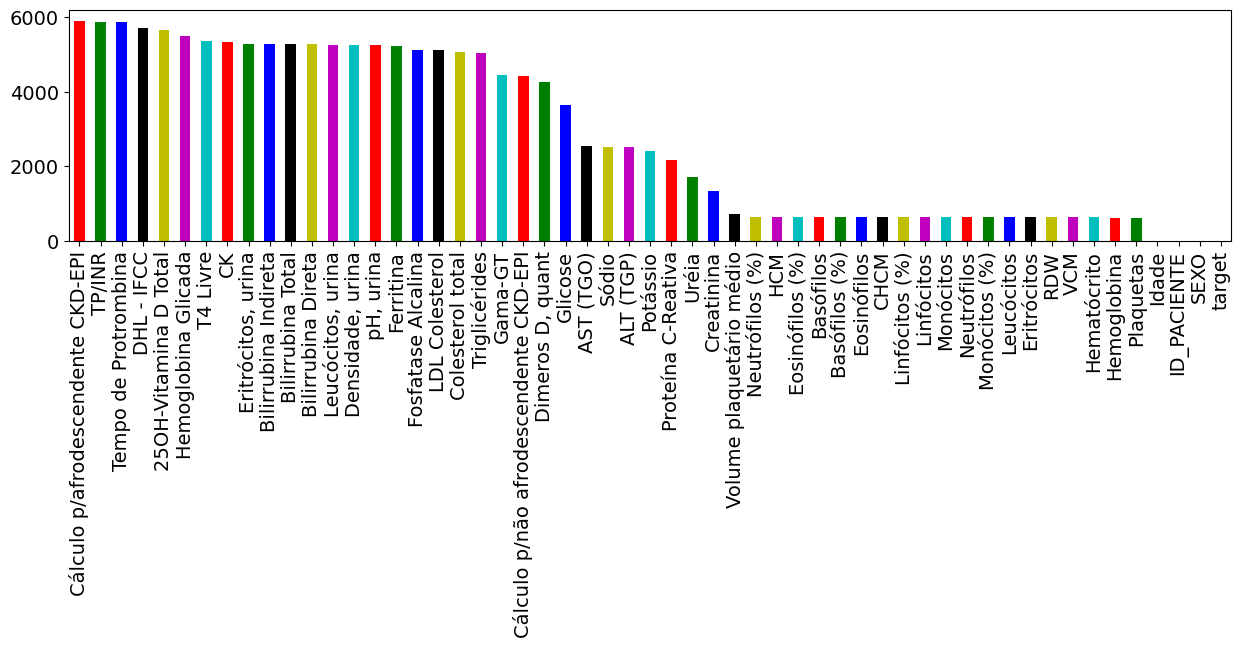

In [379]:
mi = pd.Series(mi)
#mi.index = X_train.columns
mi=mi.sort_values(ascending = False)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
mi.plot(kind='bar', color=my_colors, figsize=(15,3))
plt.show()

#### **DESCRIBE**

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [382]:
profile = sirio_aprendizado.profile_report(title="RELATORIO")
profile.to_file(output_file="RELATORIO.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 55/55 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]